In [1]:
#importing libraries
import pandas as pd
import numpy as np

#Visualaization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for  warnings
import warnings
warnings.filterwarnings(action='ignore') # do not show warnings

#Scikit for building logistic regression model
from sklearn.model_selection import train_test_split #for splitting dataframe into training and test sets
from sklearn.preprocessing import StandardScaler #for scaling the split training and test data sets
from sklearn.feature_selection import RFE #for feature selection using Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression #for building logistic regression models
import statsmodels.api as sm #for building regression model
from statsmodels.stats.outliers_influence import variance_inflation_factor #Variance inflation factors allow a quick measure of how much a variable is contributing to the standard error in the regression.
from sklearn import metrics #for visualizing true positives through confusion matrix

In [2]:
#to display all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#importing dataset
df= pd.read_csv('Leads.csv')

In [4]:
df.shape#displaying number of rows and columns

(9240, 37)

In [5]:
df.head() # checking for first few rows of the dataframe

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.columns#inspecting all the columns of the dataframe

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
df["Converted"].unique()
#we have Target column with binary values hence we will use Binary classification model for predicting values

array([0, 1], dtype=int64)

## Data Cleaning

In [8]:
# Converting all the values to lower case for easier analysis
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [9]:
#checking for duplicate values
df.duplicated().sum()
#there are no duplicate values

0

In [10]:
#we will check for unique values to remove columns which have only one value
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
#we will remove columns with only one unique value as it will not affect predictions of the model
single_value_columns = [] #creating an empty list

for column in df.columns:#this loop iterates over each column in the dataframe
    if len(df[column].unique()) == 1:#condition checks if the number of unique values in the current column is equal to 1.
        single_value_columns.append(column) #If the condition is satisfied, i.e., the column has only one unique value, the column name is added to the single_value_columns list using the append() function.

print(single_value_columns)#printing the list of column names that have only one unique value.

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [12]:
df = df.drop(single_value_columns, axis=1)#dropping columns with only one value in single_value_columns dataframe

In [13]:
df.nunique()#inspecting the dataset after dropping the columns

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

In [14]:
#inspecting categorical column's value counts except column 'Prospect ID' which is an Id column
for column in df.columns:
    if column != "Prospect ID" and df[column].dtype == 'object':#will show only columns with data types object except id column 'Prospect ID'
        print(df[column].value_counts())

landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: Lead Origin, dtype: int64
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64
no     8506
yes     734
Name: Do Not Email, dtype: int64
no     9238
yes       2
Name: Do Not Call, dtype: int64
email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website         

In [15]:
#As we have many values with value as 'select',we will Convert 'Select' values to NaN.
df = df.replace('select', np.nan)

In [16]:
#checking data after replacing 'select' values with NaN for easier analysis
for column in df.columns:
    if column != "Prospect ID" and df[column].dtype == 'object':#all categorical columns except 'prospect id' will be dispalyed
        print(df[column].value_counts())

landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: Lead Origin, dtype: int64
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64
no     8506
yes     734
Name: Do Not Email, dtype: int64
no     9238
yes       2
Name: Do Not Call, dtype: int64
email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website         

## Missing value treatment

In [17]:
#checking for missing values
100*df.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [18]:
#we will remove the columns with missing values more than 45 percent as imputing them with standard values will create bias in predicted values
# Dropping multiple columns
cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [19]:
100*df.isnull().mean()#inspecting columns after dropping columns with missing values more than 45 percent

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [20]:
#Removing missing value rows in the columns with less than 5 percent
df= df.dropna(subset=['Lead Source'])
df= df.dropna(subset=['TotalVisits'])
df= df.dropna(subset=['Page Views Per Visit'])
df= df.dropna(subset=['Last Activity'])

In [21]:
100*df.isnull().mean()#inspecting columns after dropping missing values

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                          25.303064
Specialization                                   36.169275
What is your current occupation                  29.567996
What matters most to you in choosing a course    29.777386
Search                                            0.000000
Newspaper Article                                 0.0000

In [22]:
df.shape#checking rows and columns after removing the data

(9074, 25)

In [23]:
#we will do missing value imputation after train-test split 

In [24]:
# Inspecting the categorical columns in the dataframe to check columns which is irrelvant or has low variability for predictions
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [25]:
#Inspecting value counts of categorical columns to remove columns with low variablity 
column_names = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization','What is your current occupation',
                'What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                'Through Recommendations','Tags','City','A free copy of Mastering The Interview','Last Notable Activity']

for column in column_names:
    print(df[column].value_counts())
#displaying value counts of the categorical columns to analyse which columns affect the least during predicting values

landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64
no     8358
yes     716
Name: Do Not Email, dtype: int64
no     9072
yes       2
Name: Do Not Call, dtype: int64
email opened                    3432
sms sent                        2716
olark chat conversation          972
page visited on website          640
converted to lead          

In [26]:
# we will remove columns which has low variability in predicting values based on the value counts
columns_to_drop=['Do Not Email','Do Not Call',
                 'What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
df = df.drop(columns_to_drop, axis=1)

1. We will remove 'Do Not Email','Do Not Call' columns as they will mostly not impact predictions directly, and both the columns have generic values.
2. We will remove 'What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement', 'A free copy of Mastering The Interview'because it has generic answer and not much information can be gained from the columns.
3. We will remove Through Recommendations column as only 7 people had yes, which says only 7 people have joined through recommendation
4. there is some data inconsisties in column 'city' which will impute later


In [27]:
#analysing value counts of 'Lead Source' column
df['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [28]:
#Changing the name of all the value counts which have less than 100 value counts to 'others'
df['Lead Source'] = df['Lead Source'].apply(lambda x: x if df['Lead Source'].value_counts()[x] >= 100 else 'others')
value_counts = df['Lead Source'].value_counts()

print(value_counts)

google              2873
direct traffic      2543
olark chat          1753
organic search      1154
reference            443
welingak website     129
referral sites       125
others                54
Name: Lead Source, dtype: int64


In [29]:
#inspecting 'Last Activity' column
df['Last Activity'].value_counts()

email opened                    3432
sms sent                        2716
olark chat conversation          972
page visited on website          640
converted to lead                428
email bounced                    312
email link clicked               267
form submitted on website        116
unreachable                       90
unsubscribed                      59
had a phone conversation          25
view in browser link clicked       6
approached upfront                 5
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [30]:
#we will remove value_counts 'unreachable','unsubscribed', as they have low variability in predicting values
# values to be removed
values_to_remove = ['unreachable', 'unsubscribed']

# Filtering the DataFrame to exclude rows with the specified values
df = df[~df['Last Activity'].isin(values_to_remove)]

In [31]:
#checking 'last activity' column again after dropping several column
df['Last Activity'].value_counts()

email opened                    3432
sms sent                        2716
olark chat conversation          972
page visited on website          640
converted to lead                428
email bounced                    312
email link clicked               267
form submitted on website        116
had a phone conversation          25
view in browser link clicked       6
approached upfront                 5
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [32]:
#we will use 'others' column here also for values with less than 100 value counts
#processing Lead Activity column
df['Last Activity'] = df['Last Activity'].apply(lambda x: x if df['Last Activity'].value_counts()[x] >= 100 else 'others')
value_counts = df['Last Activity'].value_counts()

print(value_counts)

email opened                 3432
sms sent                     2716
olark chat conversation       972
page visited on website       640
converted to lead             428
email bounced                 312
email link clicked            267
form submitted on website     116
others                         42
Name: Last Activity, dtype: int64


In [33]:
#inspecting 'Country' column's value counts
df['Country'].value_counts()

india                   6364
united states             67
united arab emirates      53
singapore                 24
saudi arabia              20
united kingdom            14
australia                 11
qatar                     10
bahrain                    7
hong kong                  7
france                     6
unknown                    5
oman                       5
nigeria                    4
kuwait                     4
south africa               4
germany                    4
sweden                     3
canada                     3
netherlands                2
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
philippines                2
ghana                      2
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia                   1
russia        

In [34]:
#we will change value counts of 'country' column where the countries other than india as 'outside india'
#as the countries other than india has less than 100 value counts ,
# which will not make significant difference in predicting values. 
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

india            6364
outside india    2561
Name: Country, dtype: int64

In [35]:
#inspecting value counts of 'last notable activity'
df['Last Notable Activity'].value_counts()

modified                        3195
email opened                    2823
sms sent                        2152
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: Last Notable Activity, dtype: int64

In [36]:
#we will use 'others' column here also for values with less than 100 value counts
#processing Last Notable Activity column
df['Last Notable Activity'] = df['Last Notable Activity'].apply(lambda x: x if df['Last Notable Activity'].value_counts()[x] >= 100 else 'others')
value_counts = df['Last Notable Activity'].value_counts()

print(value_counts)

modified                   3195
email opened               2823
sms sent                   2152
page visited on website     318
olark chat conversation     183
email link clicked          173
others                       81
Name: Last Notable Activity, dtype: int64


In [37]:
#checking missing values
100*df.isnull().mean()

Prospect ID                         0.000000
Lead Number                         0.000000
Lead Origin                         0.000000
Lead Source                         0.000000
Converted                           0.000000
TotalVisits                         0.000000
Total Time Spent on Website         0.000000
Page Views Per Visit                0.000000
Last Activity                       0.000000
Country                             0.000000
Specialization                     36.392157
What is your current occupation    29.647059
Tags                               36.840336
City                               39.663866
Last Notable Activity               0.000000
dtype: float64

In [38]:
#Inspecting value counts of columns 'Specialization', 'What is your current occupation', 'Tags' , 'City'
#to remove columns with low variablity to predictions
col_name = ['Specialization', 'What is your current occupation', 'Tags' , 'City' ]

for column in col_name:
    print(df[column].value_counts())

finance management                   935
human resource management            826
marketing management                 813
operations management                489
business administration              389
it projects management               360
supply chain management              338
banking, investment and insurance    332
travel and tourism                   198
media and advertising                197
international business               170
healthcare management                153
hospitality management               108
e-commerce                           108
retail management                     96
rural and agribusiness                69
e-business                            56
services excellence                   40
Name: Specialization, dtype: int64
unemployed              5374
working professional     669
student                  205
other                     15
housewife                  9
businessman                7
Name: What is your current occupation, dtype: int64
w

In [39]:
#we have values with value counts less than 100 hence we will impute it with separate value 'others'
#after checking for missing values and imputing it

In [40]:
#checking for missing values
100*df.isnull().mean()

Prospect ID                         0.000000
Lead Number                         0.000000
Lead Origin                         0.000000
Lead Source                         0.000000
Converted                           0.000000
TotalVisits                         0.000000
Total Time Spent on Website         0.000000
Page Views Per Visit                0.000000
Last Activity                       0.000000
Country                             0.000000
Specialization                     36.392157
What is your current occupation    29.647059
Tags                               36.840336
City                               39.663866
Last Notable Activity               0.000000
dtype: float64

In [41]:
# we will replace missing values in the four columns 'Specialization','What is your current occupation','Tags','City'to unknown
# to avoid scaling issues because of missing values, we replace missing values with'unknown' and later in the process impute it
columns_to_replace = ['Specialization', 'What is your current occupation', 'Tags', 'City']

# Imputing missing values with 'unknown'
df[columns_to_replace] = df[columns_to_replace].fillna('unknown')                 

In [42]:
#Inspecting value counts of categorical columns to remove columns with low variablity to predictions
col_name = ['Specialization', 'What is your current occupation', 'Tags' , 'City' ]

for column in col_name:
    print(df[column].value_counts())

unknown                              3248
finance management                    935
human resource management             826
marketing management                  813
operations management                 489
business administration               389
it projects management                360
supply chain management               338
banking, investment and insurance     332
travel and tourism                    198
media and advertising                 197
international business                170
healthcare management                 153
e-commerce                            108
hospitality management                108
retail management                      96
rural and agribusiness                 69
e-business                             56
services excellence                    40
Name: Specialization, dtype: int64
unemployed              5374
unknown                 2646
working professional     669
student                  205
other                     15
housewife             

In [43]:
#we will replace values with less than 100 value counts as 'others' 
#we will use 'others' column here also for values with less than 100 value counts
#processing Last Notable Activity column
df['Specialization'] = df['Specialization'].apply(lambda x: x if df['Specialization'].value_counts()[x] >= 100 else 'others')
value_counts = df['Specialization'].value_counts()

print(value_counts)

unknown                              3248
finance management                    935
human resource management             826
marketing management                  813
operations management                 489
business administration               389
it projects management                360
supply chain management               338
banking, investment and insurance     332
others                                261
travel and tourism                    198
media and advertising                 197
international business                170
healthcare management                 153
e-commerce                            108
hospitality management                108
Name: Specialization, dtype: int64


In [44]:
# we will replace values with less than 100 value counts as others for data analysis
#we will use 'others' column here also for values with less than 100 value counts
#processing Last Notable Activity column
df['What is your current occupation'] = df['What is your current occupation'].apply(lambda x: x if df['What is your current occupation'].value_counts()[x] >= 100 else 'others')
value_counts = df['What is your current occupation'].value_counts()

print(value_counts)

unemployed              5374
unknown                 2646
working professional     669
student                  205
others                    31
Name: What is your current occupation, dtype: int64


In [45]:
# we will replace values with less than 100 value counts as others for data analysis
#we will use 'others' column here also for values with less than 100 value counts
#processing 'Tags' Activity column
df['Tags'] = df['Tags'].apply(lambda x: x if df['Tags'].value_counts()[x] >= 100 else 'others')
value_counts = df['Tags'].value_counts()

print(value_counts)

unknown                                3288
will revert after reading the email    1982
ringing                                1151
interested in other courses             504
already a student                       462
closed by horizzon                      298
others                                  292
switched off                            228
busy                                    181
lost to eins                            171
not doing further education             143
interested  in full time mba            115
graduation in progress                  110
Name: Tags, dtype: int64


In [46]:
#we will not replace the value counts in column 'city' as we have satisfactory values in the column already

## EDA

In [47]:
print(df.shape)#checking the shape of the dataframe after the data cleaning
print(df.info())#checking for data types

(8925, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8925 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      8925 non-null   object 
 1   Lead Number                      8925 non-null   int64  
 2   Lead Origin                      8925 non-null   object 
 3   Lead Source                      8925 non-null   object 
 4   Converted                        8925 non-null   int64  
 5   TotalVisits                      8925 non-null   float64
 6   Total Time Spent on Website      8925 non-null   int64  
 7   Page Views Per Visit             8925 non-null   float64
 8   Last Activity                    8925 non-null   object 
 9   Country                          8925 non-null   object 
 10  Specialization                   8925 non-null   object 
 11  What is your current occupation  8925 non-null   object 
 12  Tags     

In [48]:
#creating separate categorical, continuous and Id columns for easier visualizations
id_cols=['Prospect ID',"Lead Number"]
cont_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
cat_cols=['Lead Origin','Lead Source','Last Activity','Country','Specialization',
          'What is your current occupation','Tags','City','Last Notable Activity']
target=["Converted"]
len(id_cols)+len(cont_cols)+len(cat_cols)

14

## Univariate Analysis

TotalVisits


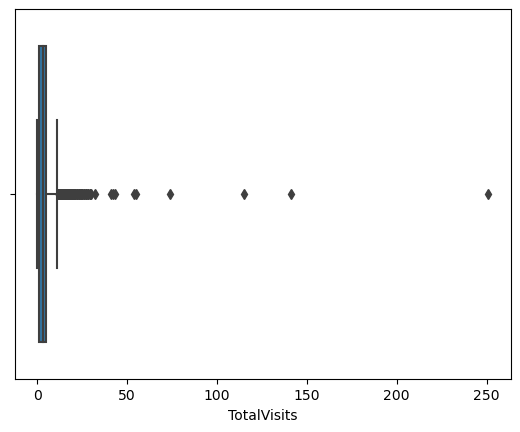

Total Time Spent on Website


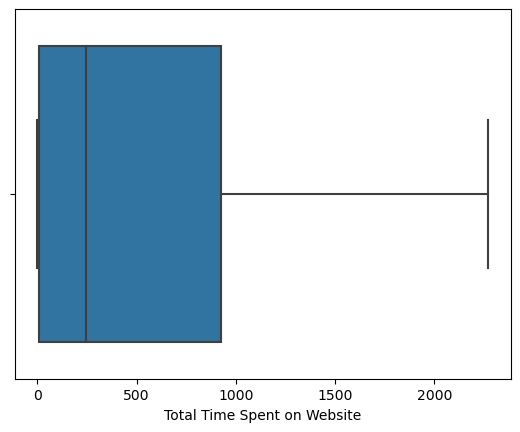

Page Views Per Visit


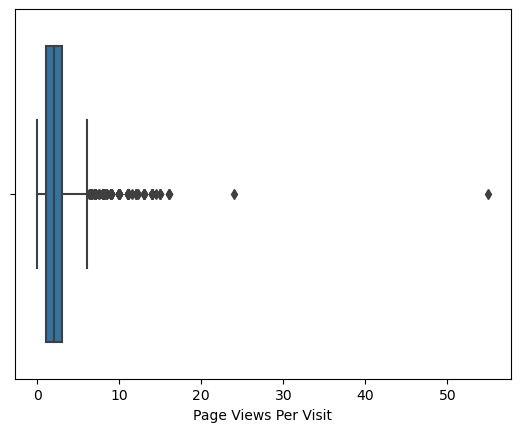

In [49]:
#checking distributions of data in  continuous column by plotting a boxplot
for i in cont_cols:
    print(i)
    sns.boxplot(df[i])
    plt.show()

TotalVisits


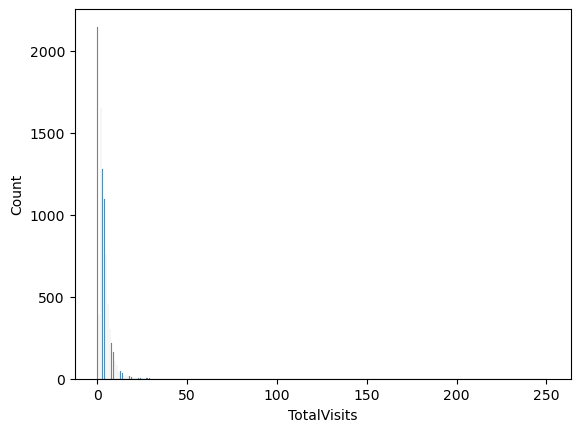

Total Time Spent on Website


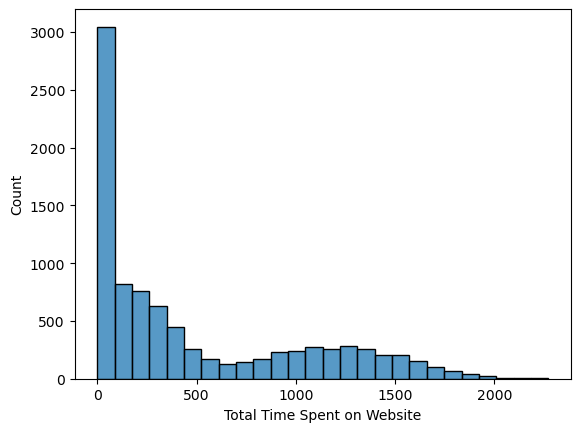

Page Views Per Visit


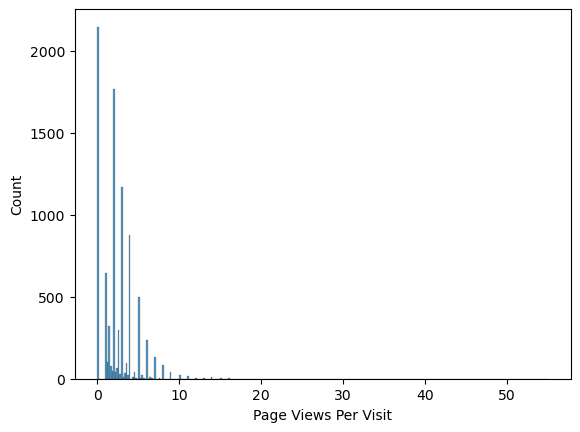

In [50]:
#checking for distributions in data by plottiong histplot
for i in cont_cols:
    print(i)
    sns.histplot(df[i])
    plt.show()

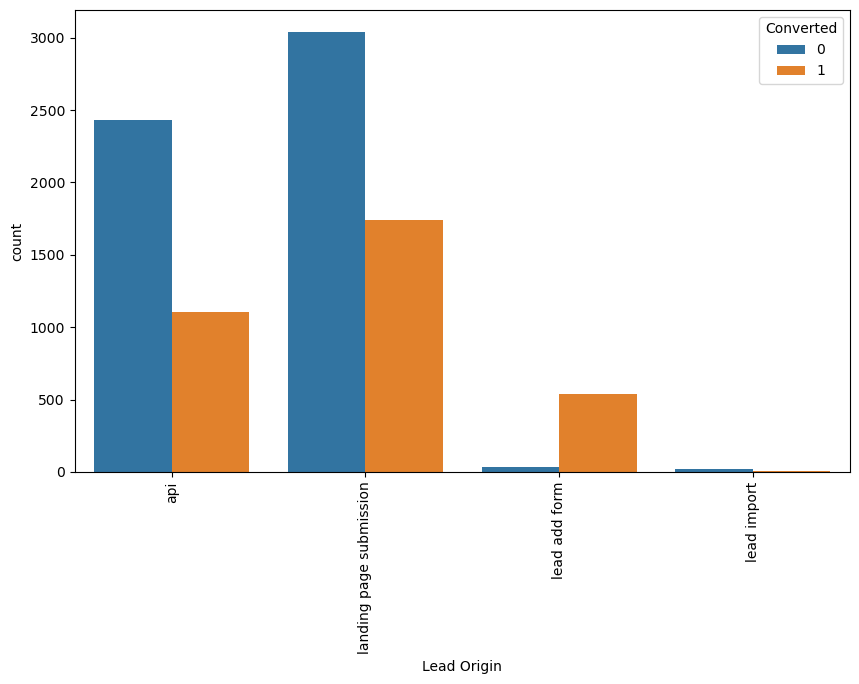

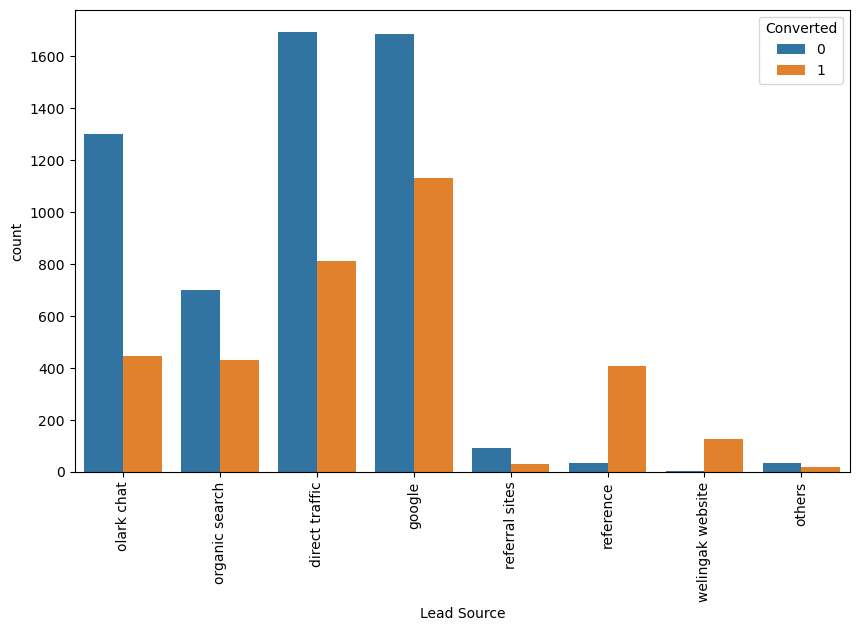

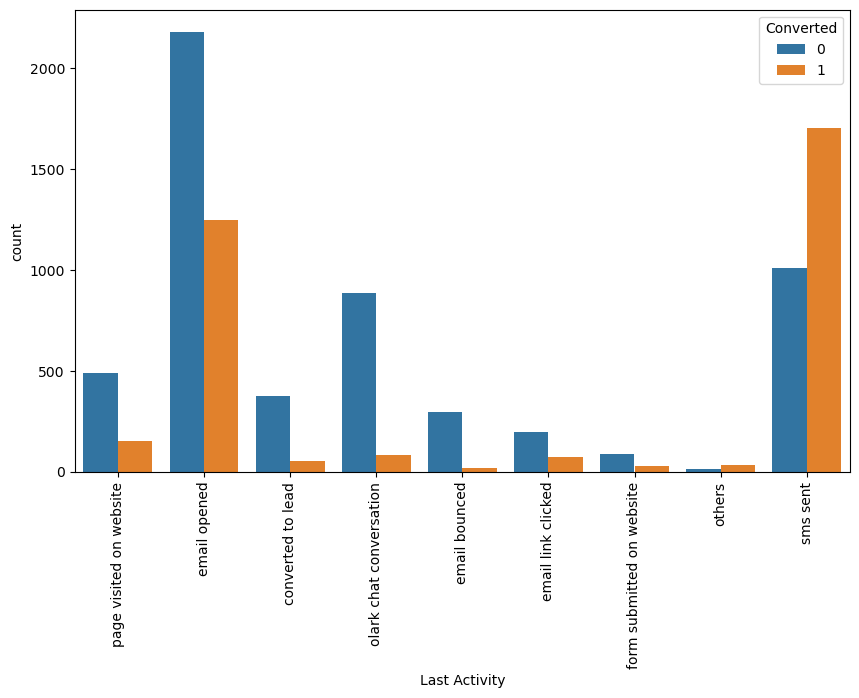

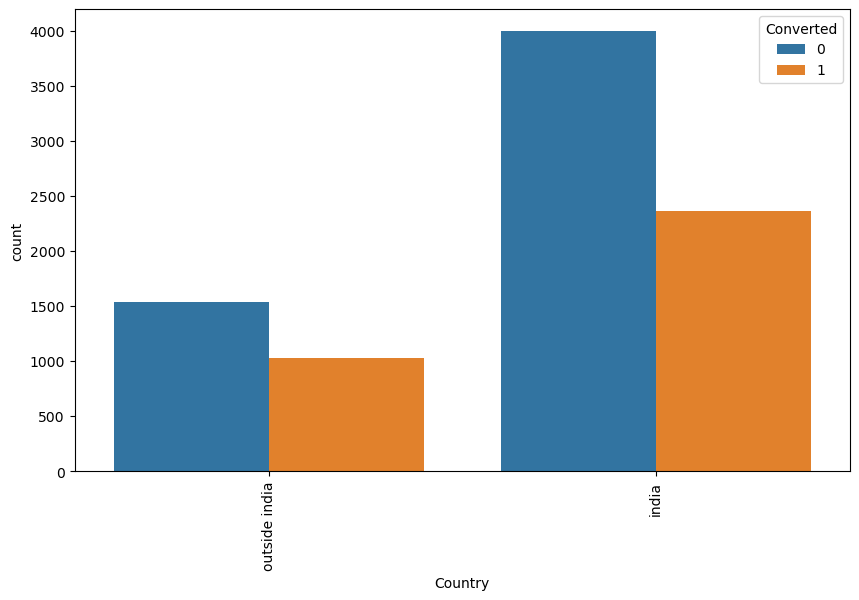

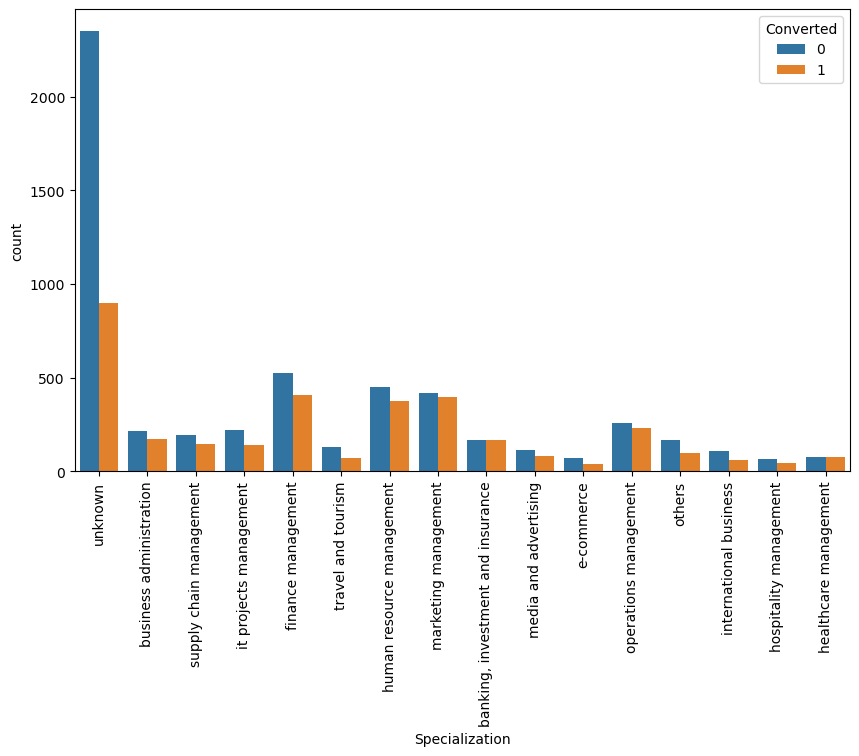

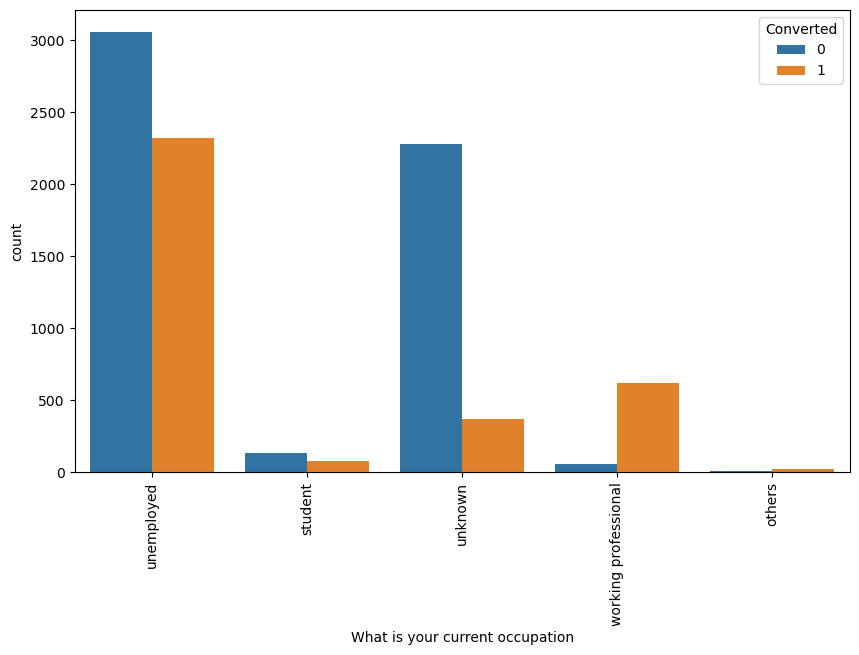

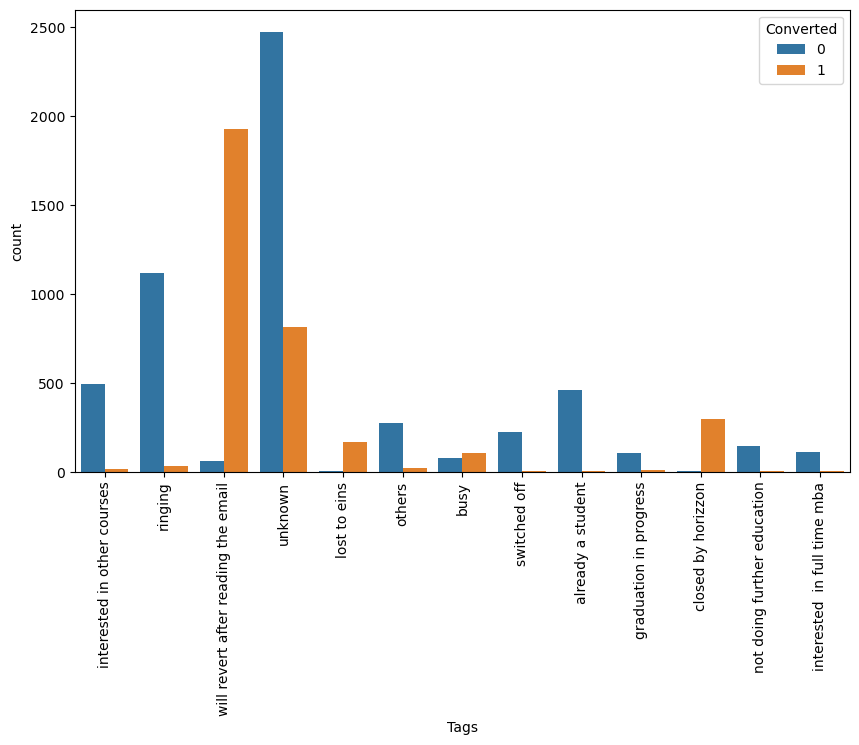

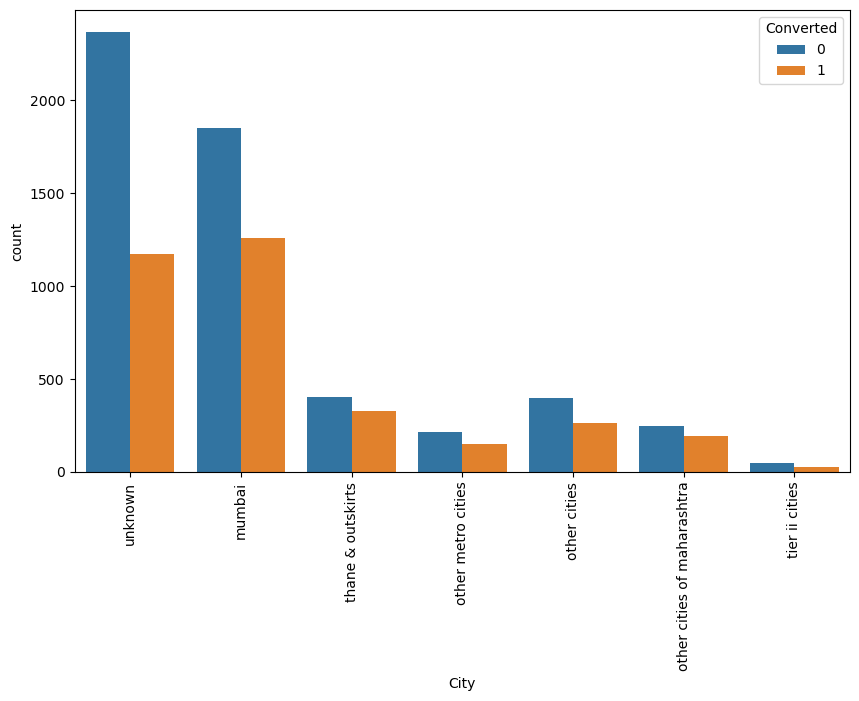

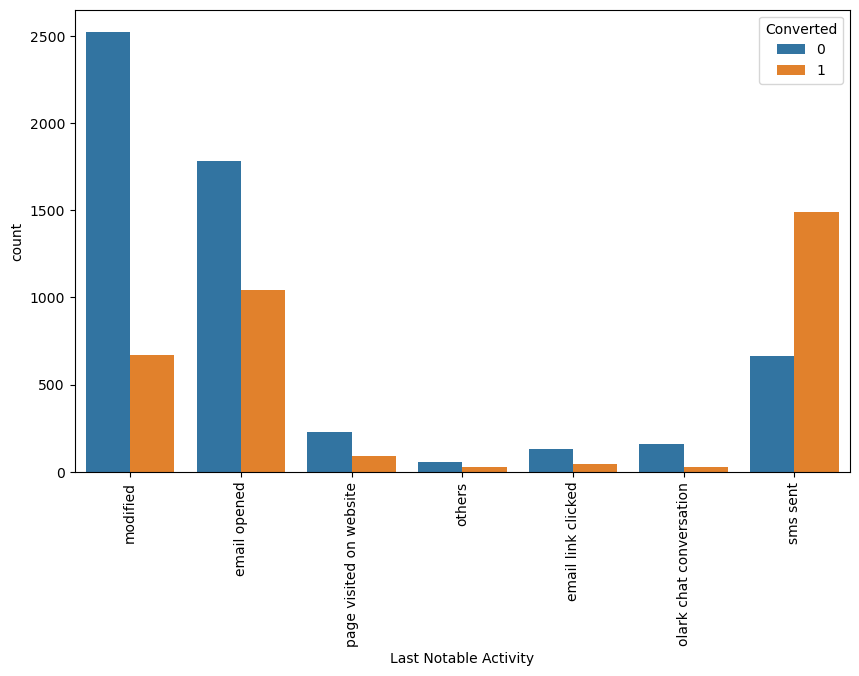

In [51]:
#plotting distribution of data in categorical columns by plotting countplot w.r.t target column 'Converted'
for i in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=i, hue='Converted', data=df)  
    plt.xticks(rotation=90)
    plt.show()

Insights from Univariate analysis:
1. Working Professionals are converted to leads most of the time.
2. Unemployed leads are in the high count compared to any other indidvidauls
3. India has the highest leads.
4. Most of the leads are from mumbai

## Bivariate Analysis

Boxplot TotalVisits Vs Lead Origin


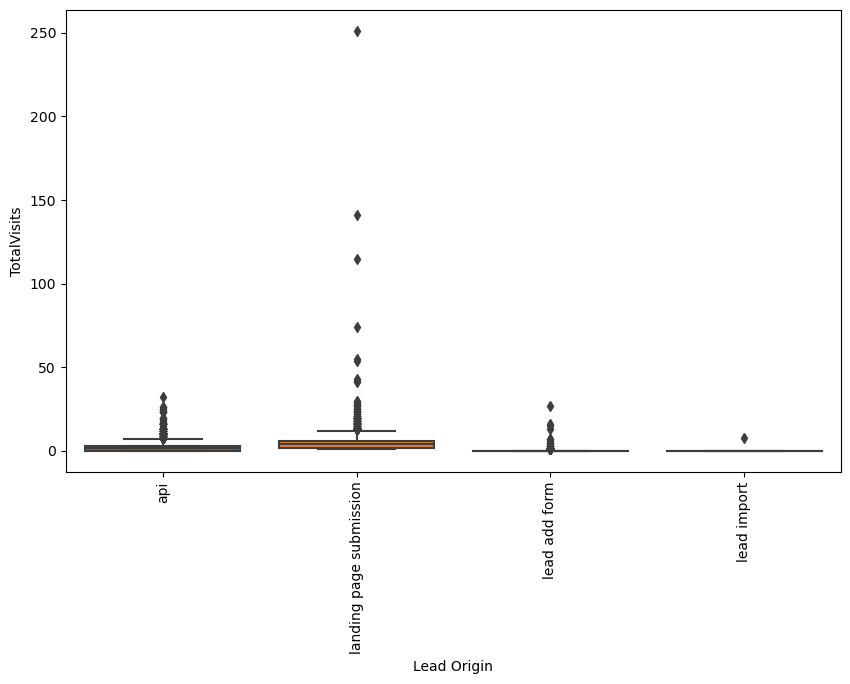

Boxplot TotalVisits Vs Lead Source


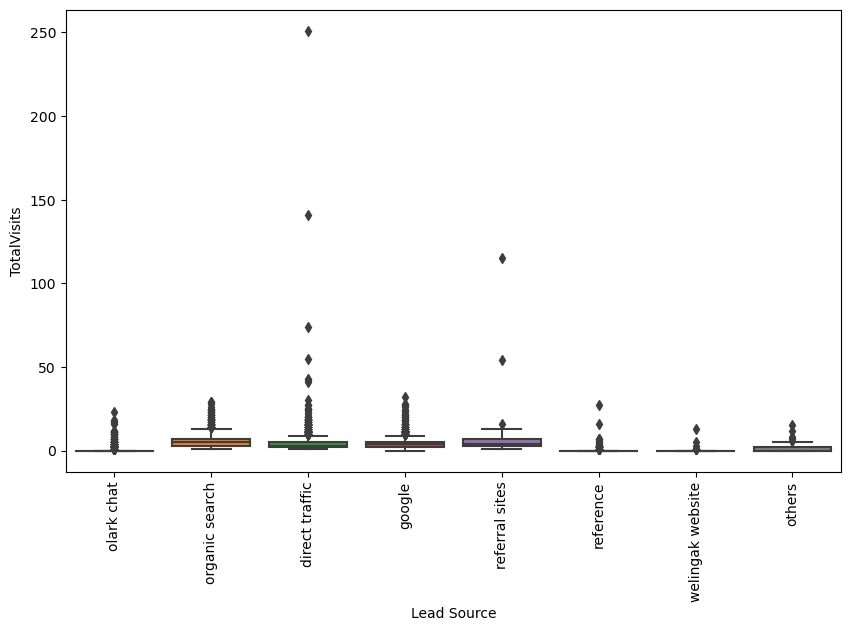

Boxplot TotalVisits Vs Last Activity


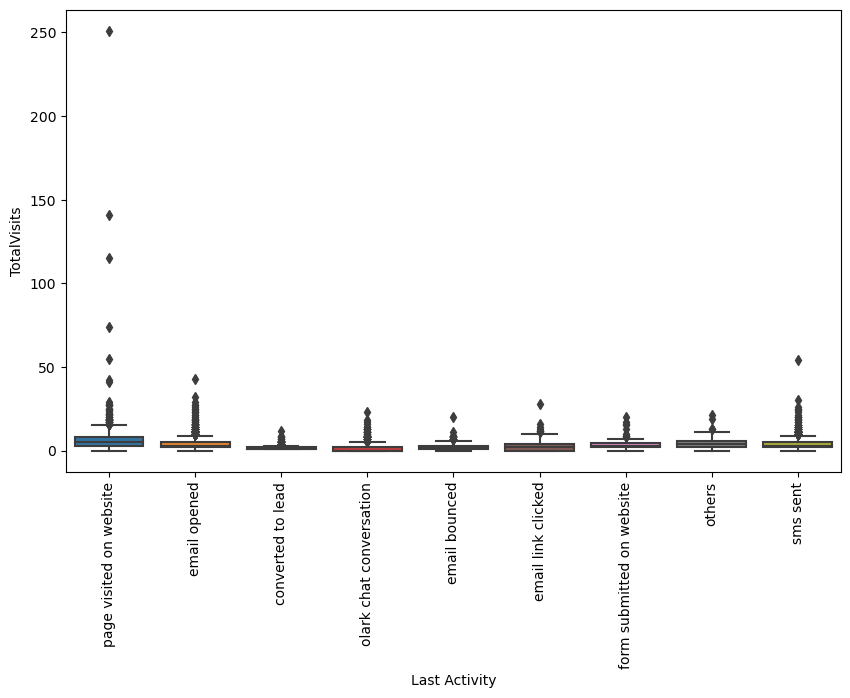

Boxplot TotalVisits Vs Country


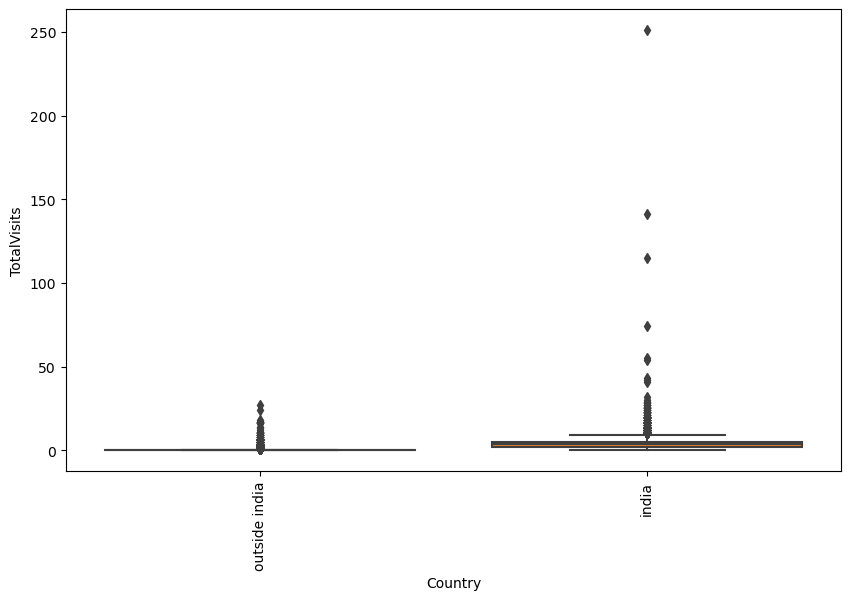

Boxplot TotalVisits Vs Specialization


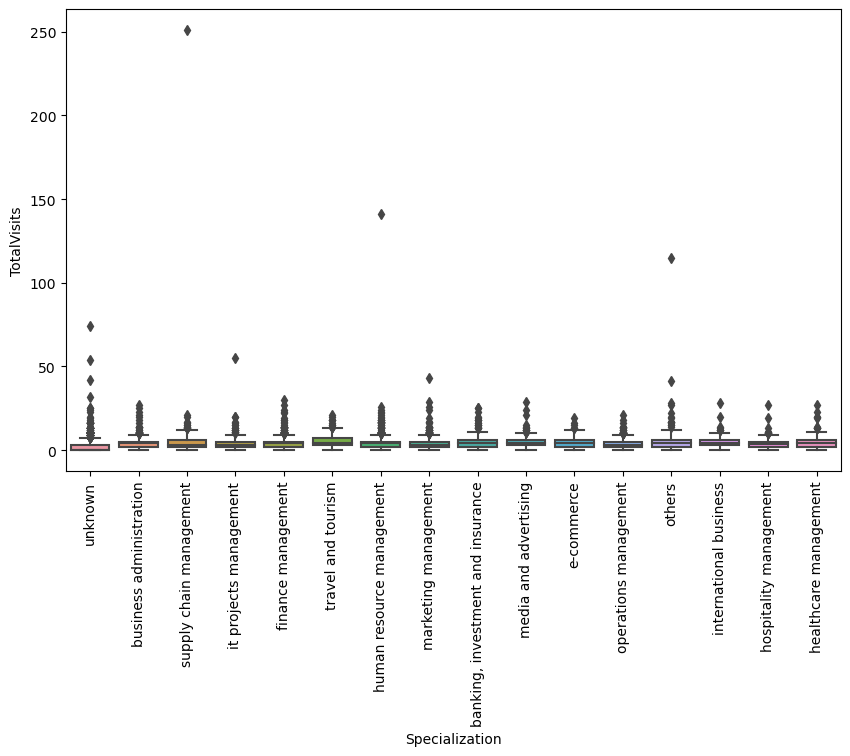

Boxplot TotalVisits Vs What is your current occupation


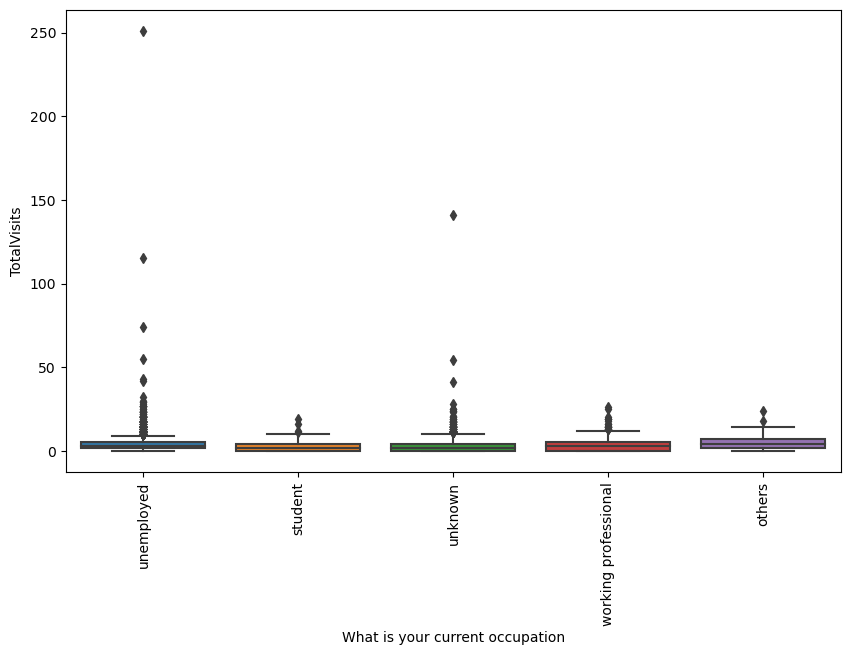

Boxplot TotalVisits Vs Tags


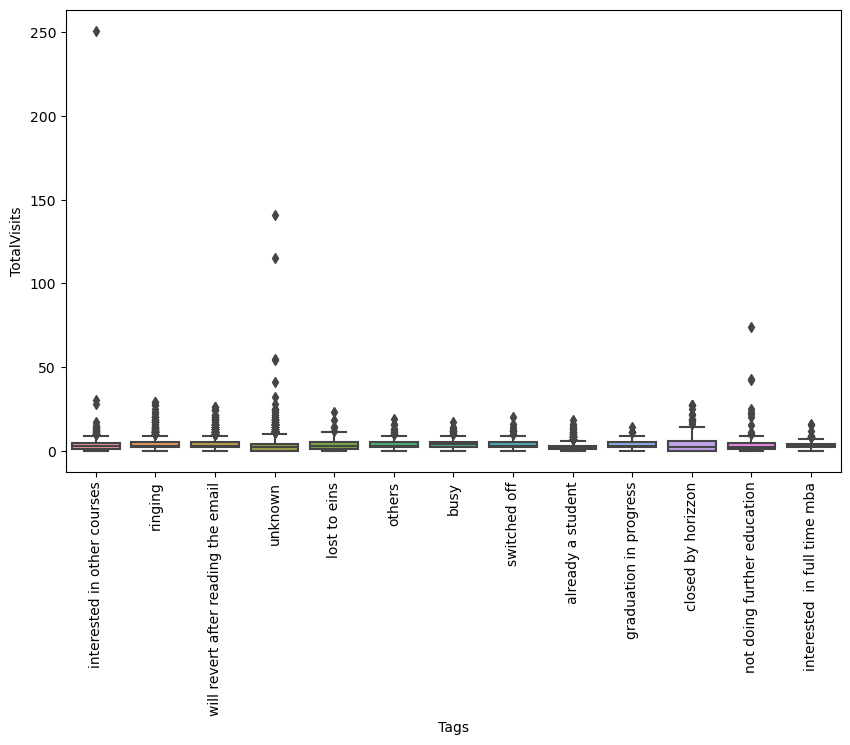

Boxplot TotalVisits Vs City


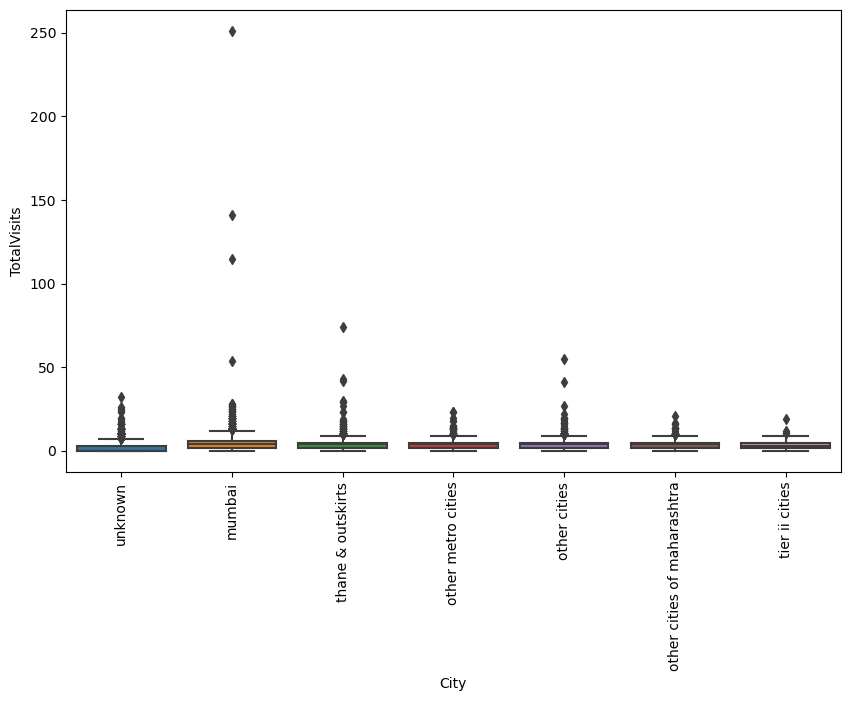

Boxplot TotalVisits Vs Last Notable Activity


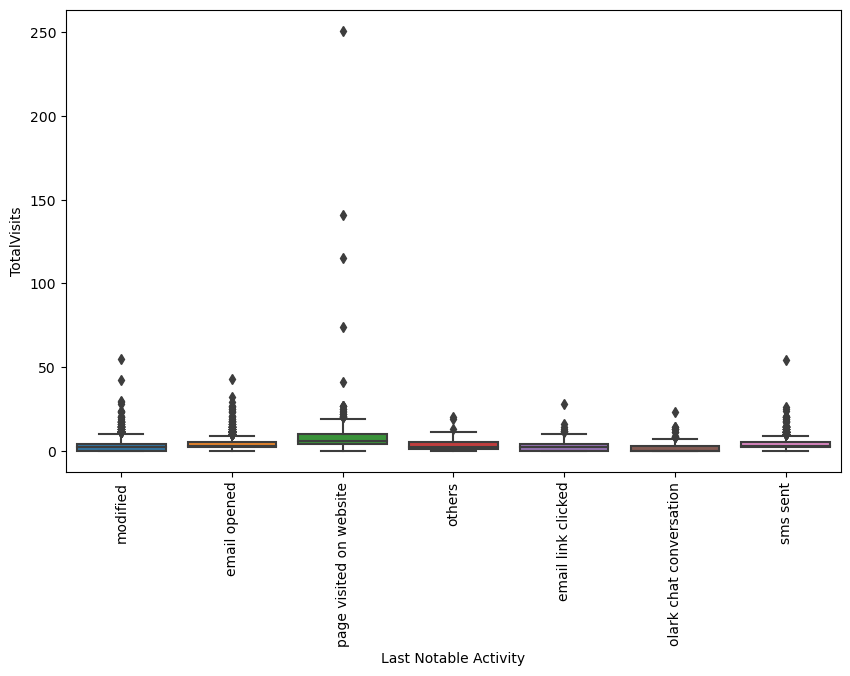

Boxplot Total Time Spent on Website Vs Lead Origin


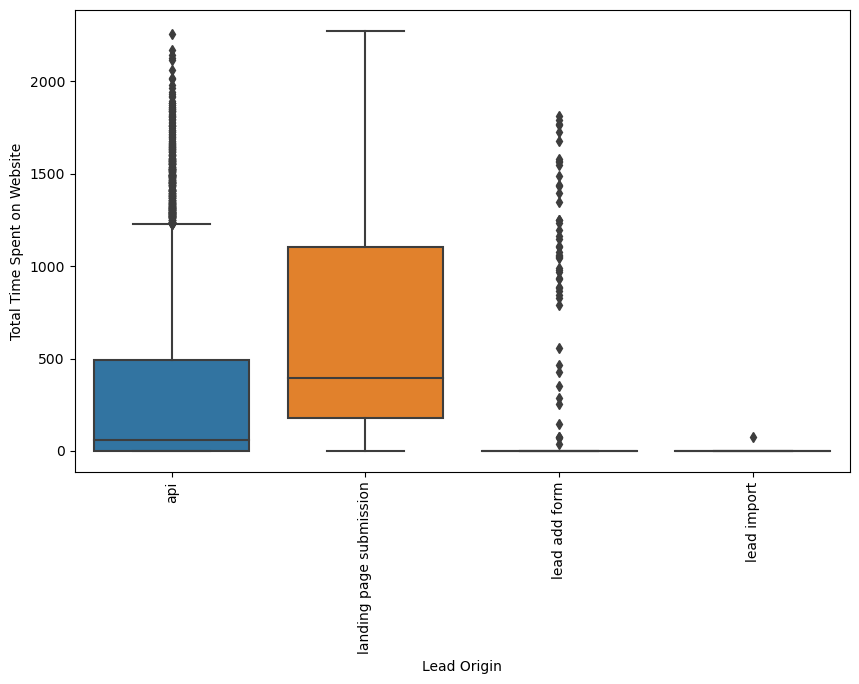

Boxplot Total Time Spent on Website Vs Lead Source


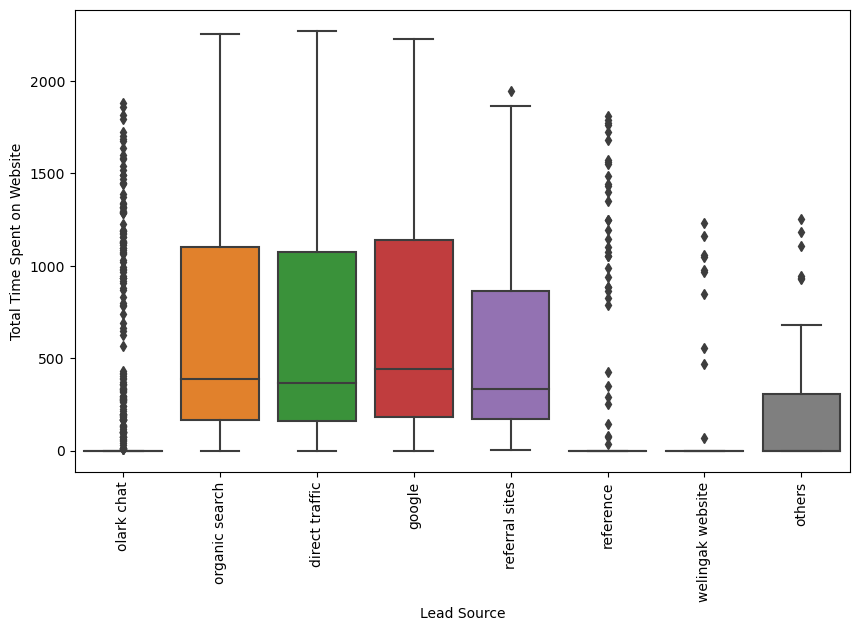

Boxplot Total Time Spent on Website Vs Last Activity


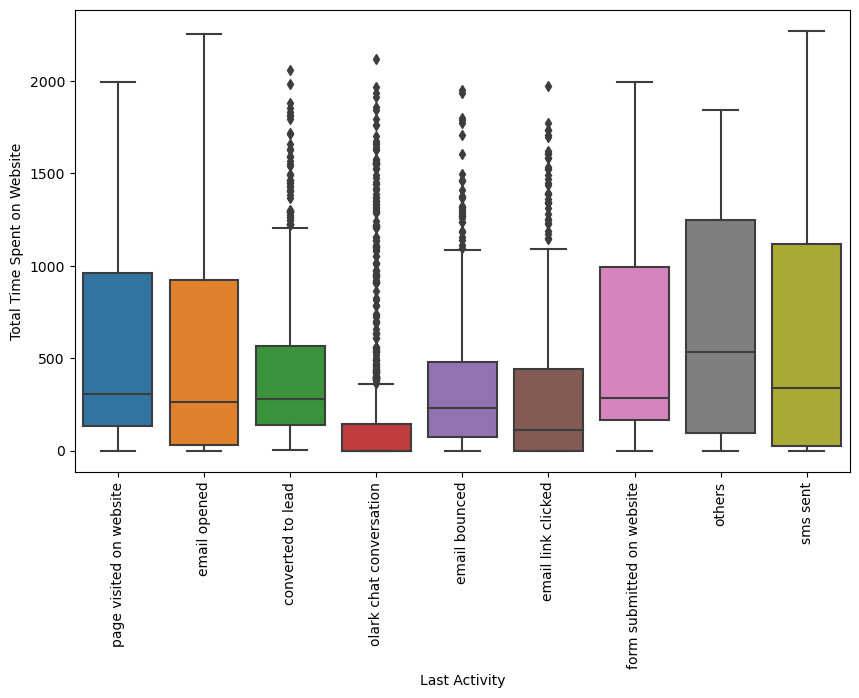

Boxplot Total Time Spent on Website Vs Country


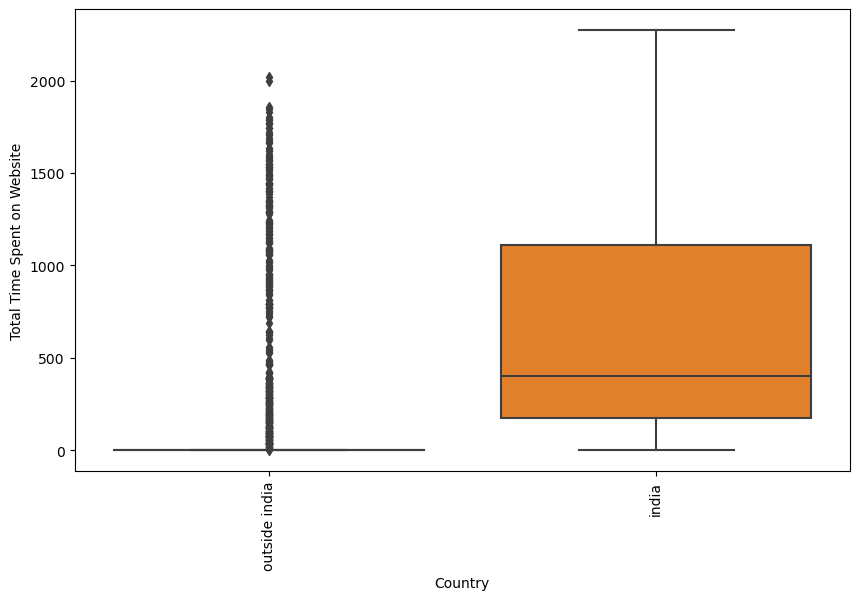

Boxplot Total Time Spent on Website Vs Specialization


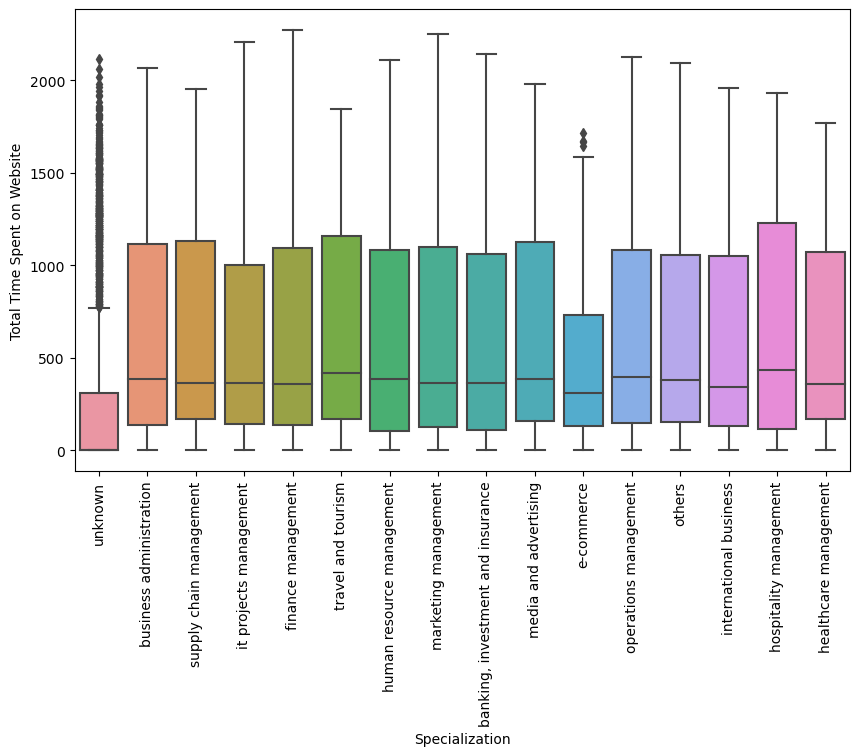

Boxplot Total Time Spent on Website Vs What is your current occupation


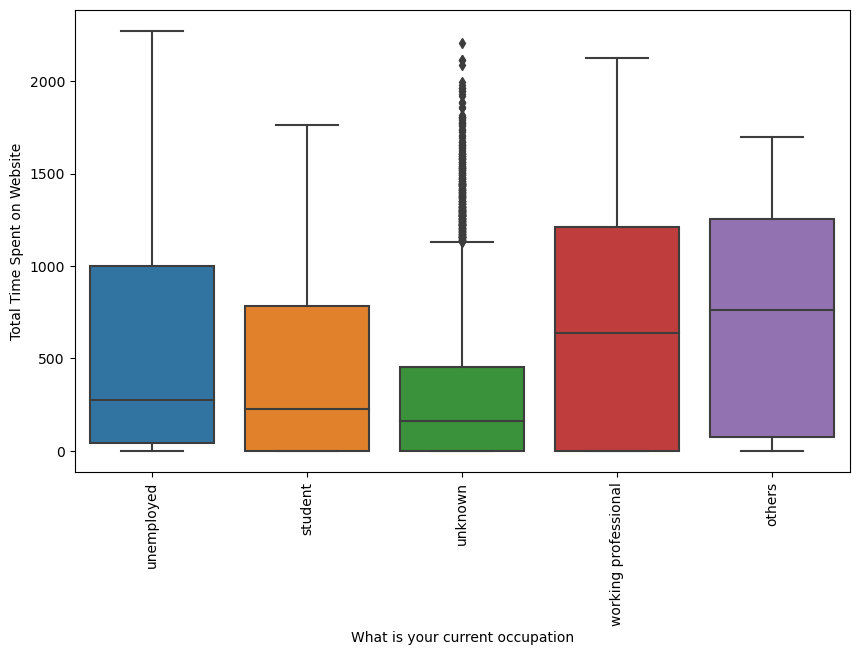

Boxplot Total Time Spent on Website Vs Tags


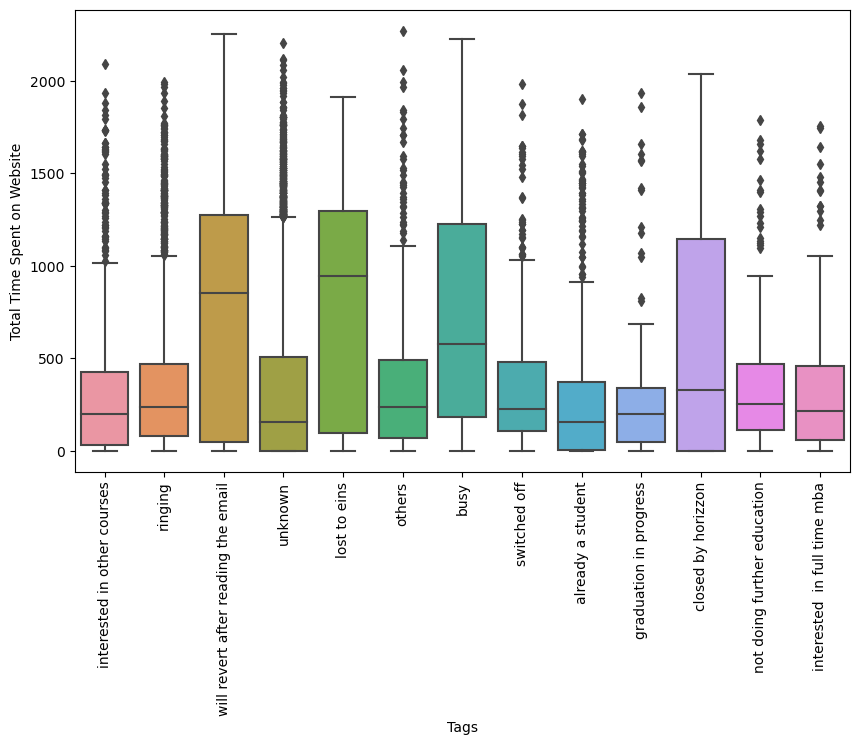

Boxplot Total Time Spent on Website Vs City


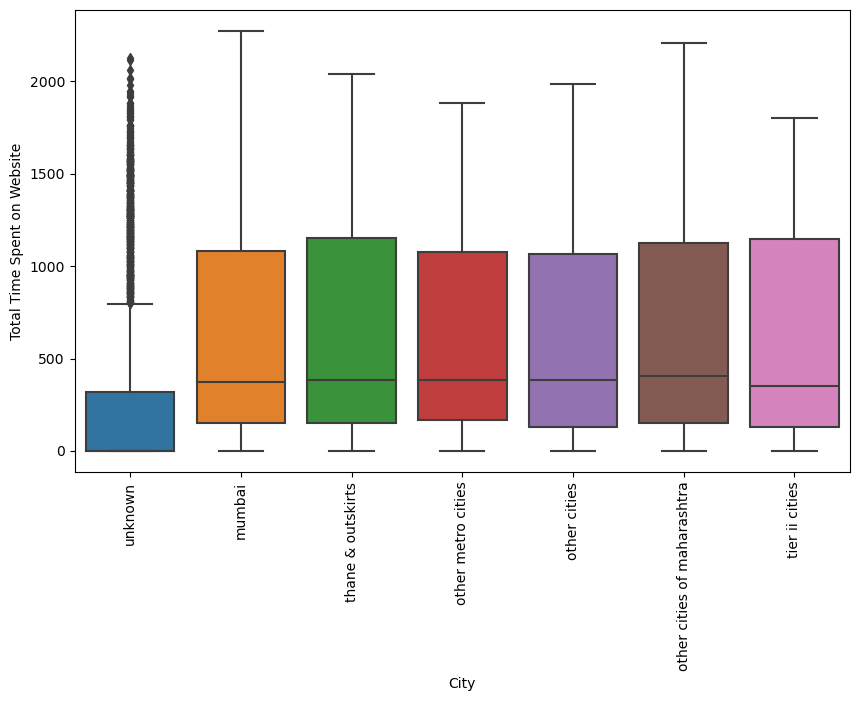

Boxplot Total Time Spent on Website Vs Last Notable Activity


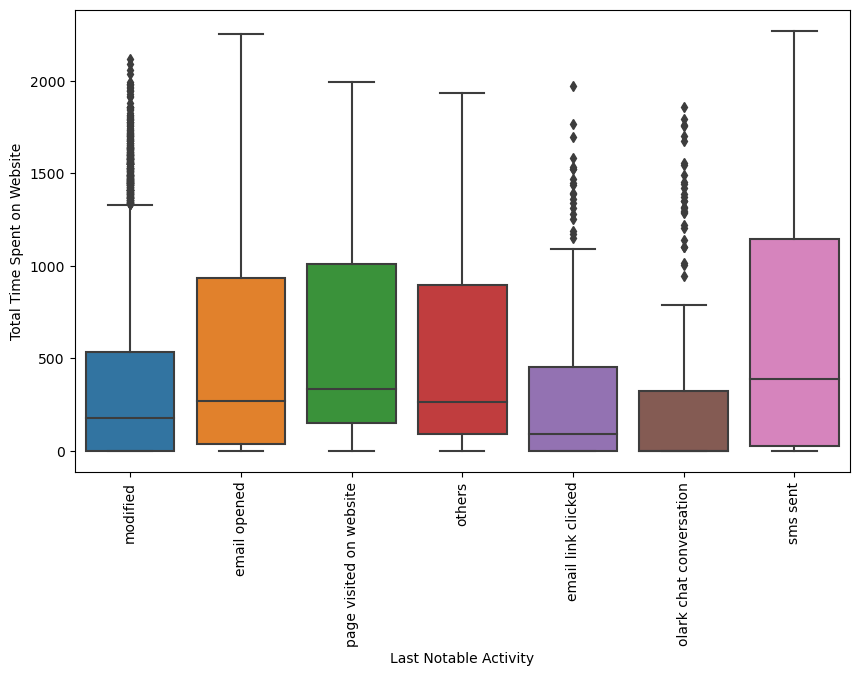

Boxplot Page Views Per Visit Vs Lead Origin


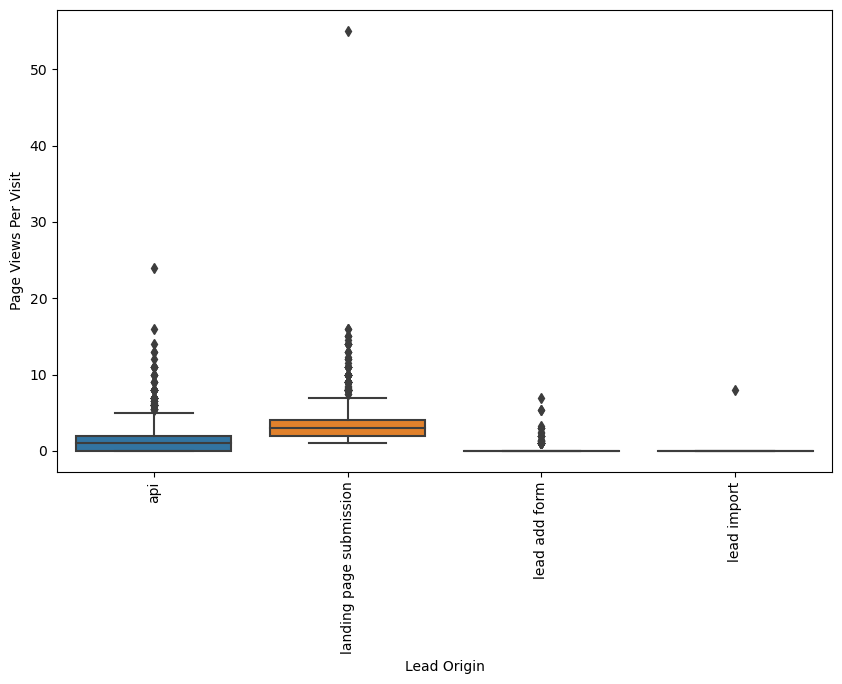

Boxplot Page Views Per Visit Vs Lead Source


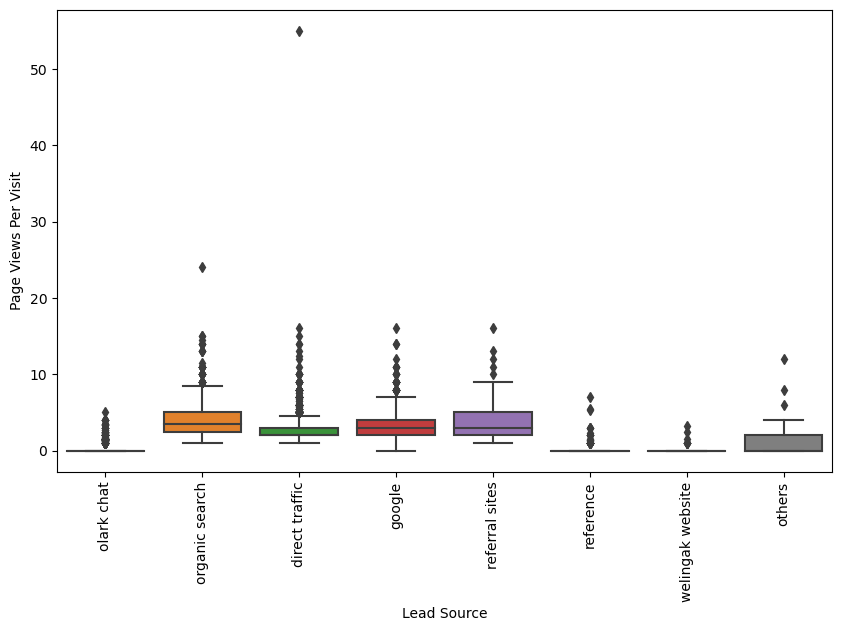

Boxplot Page Views Per Visit Vs Last Activity


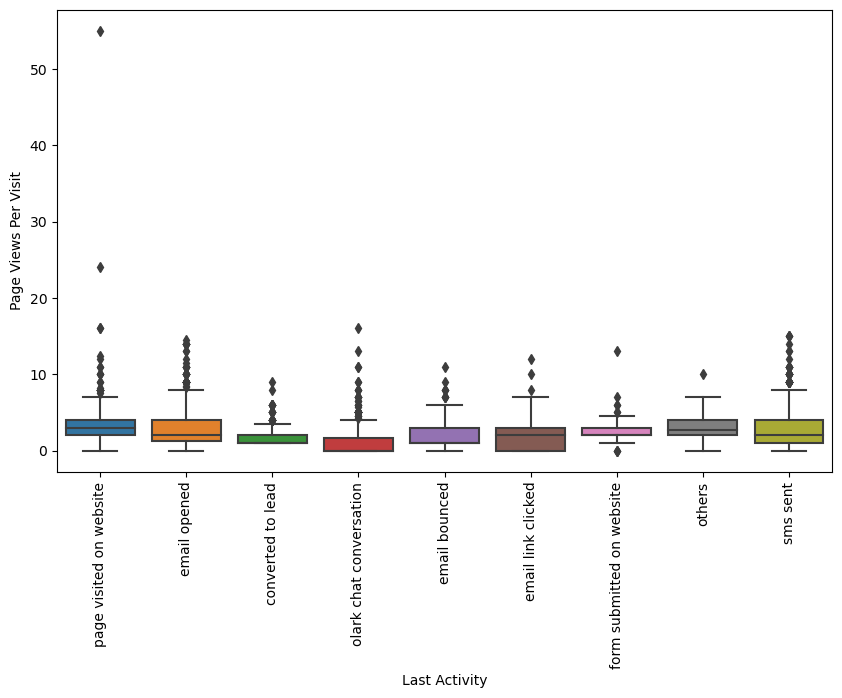

Boxplot Page Views Per Visit Vs Country


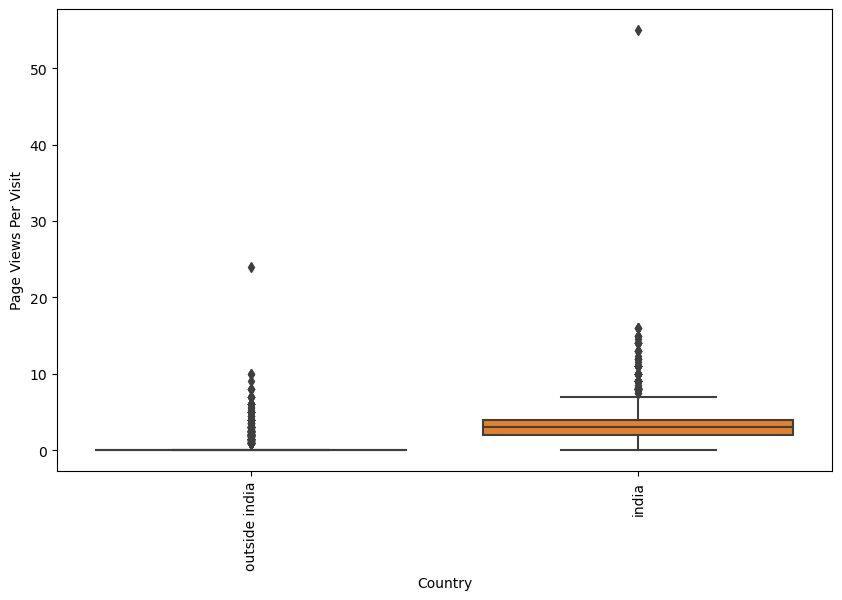

Boxplot Page Views Per Visit Vs Specialization


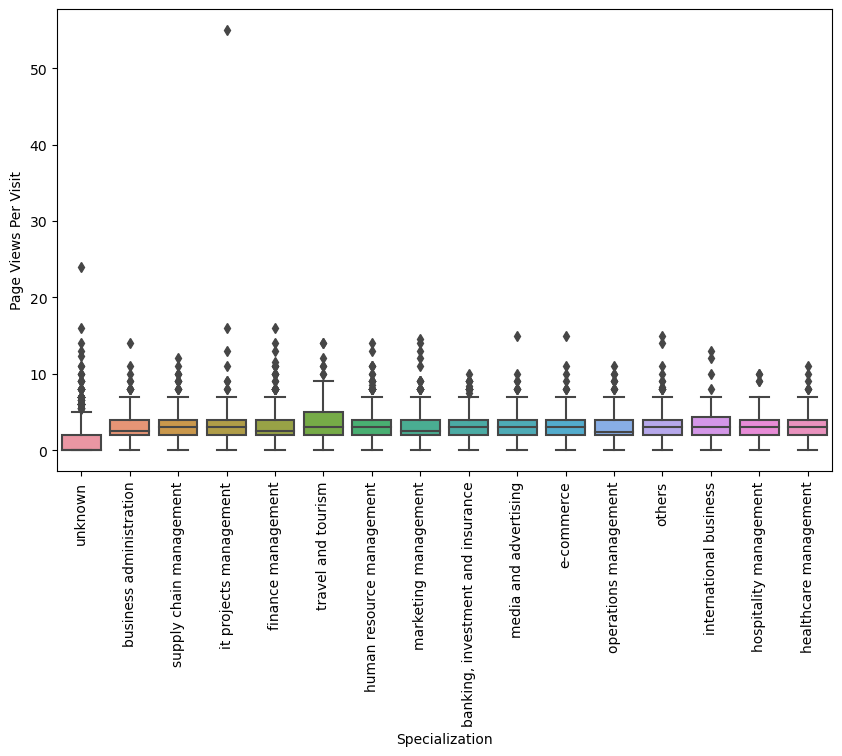

Boxplot Page Views Per Visit Vs What is your current occupation


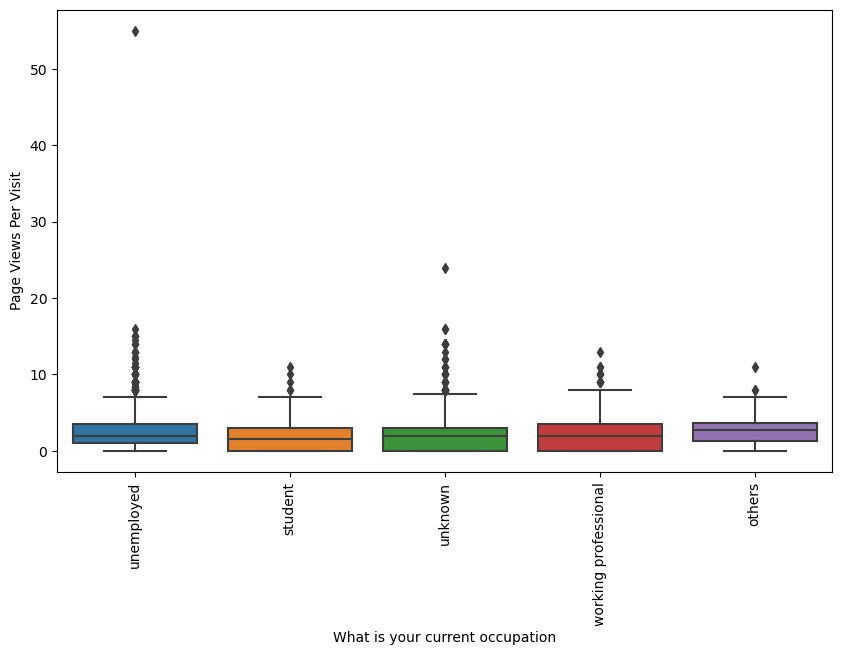

Boxplot Page Views Per Visit Vs Tags


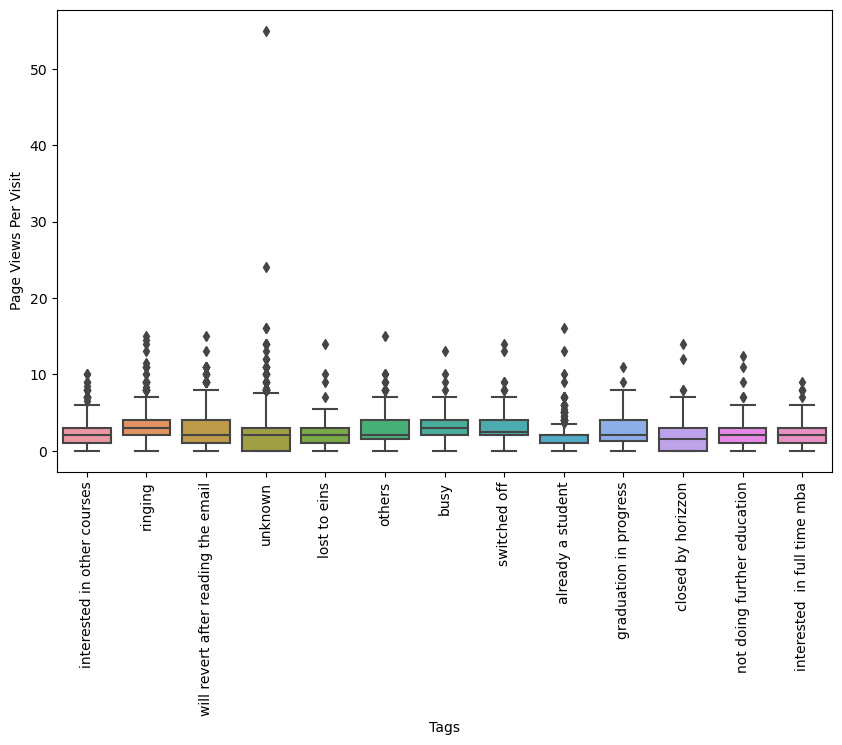

Boxplot Page Views Per Visit Vs City


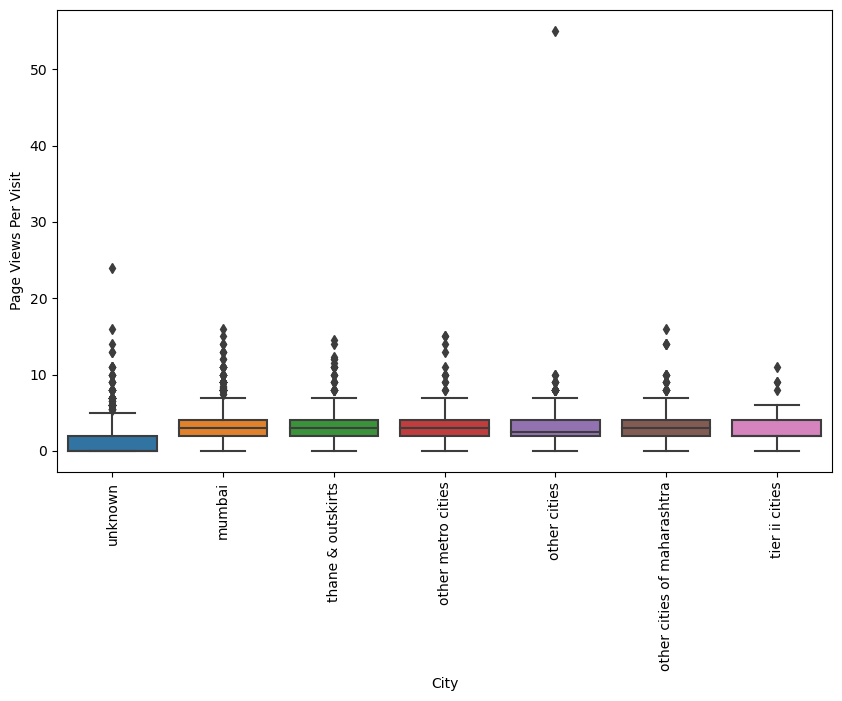

Boxplot Page Views Per Visit Vs Last Notable Activity


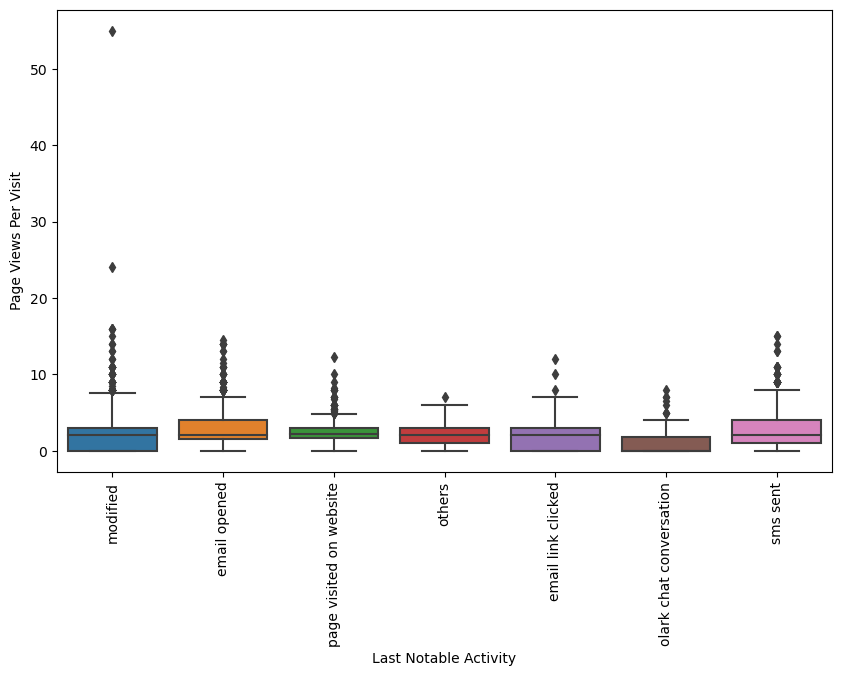

In [52]:
#Plotting relationship between continuous column and categorical columns by plotting boxplot
for i in cont_cols:
    for j in cat_cols:
        print("Boxplot", i, "Vs", j)
        plt.figure(figsize=(10, 6))  # Increase the figure size if desired
        sns.boxplot(x=j, y=i, data=df)
        plt.xticks(rotation=90)  # Rotate x-axis labels if needed
        plt.show()

ScatterPlot TotalVisits Vs Total Time Spent on Website


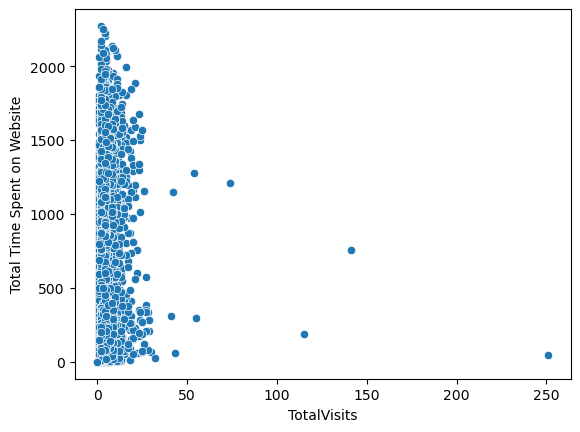

ScatterPlot TotalVisits Vs Page Views Per Visit


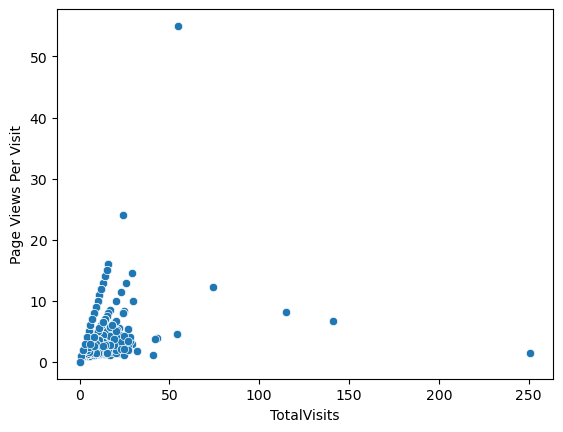

ScatterPlot Total Time Spent on Website Vs TotalVisits


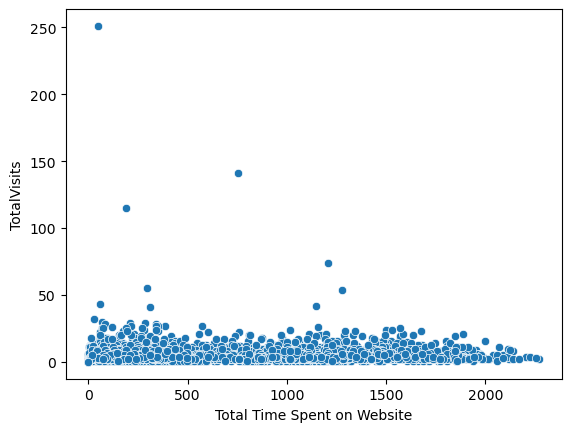

ScatterPlot Total Time Spent on Website Vs Page Views Per Visit


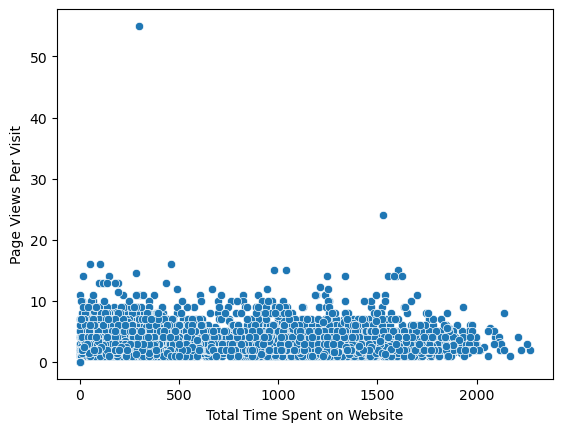

ScatterPlot Page Views Per Visit Vs TotalVisits


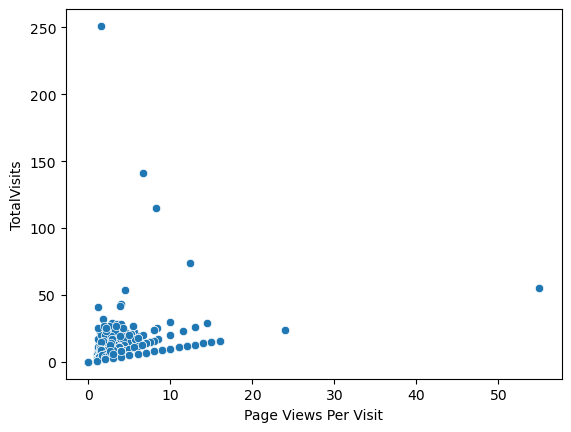

ScatterPlot Page Views Per Visit Vs Total Time Spent on Website


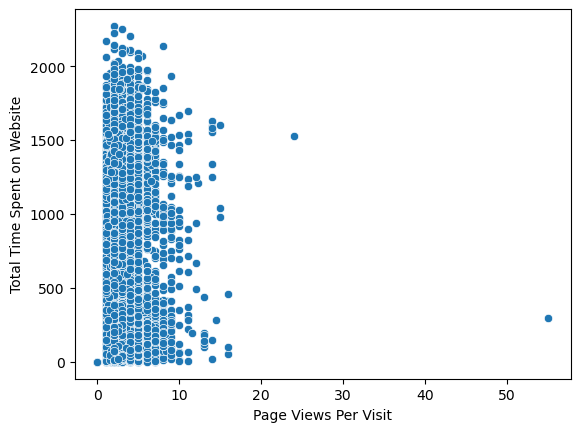

In [53]:
#Plotting relationship between continuous columns by plotting scatterplot
for i in cont_cols:
    for j in cont_cols:
        if i!=j:
            print("ScatterPlot",i,"Vs",j)
            sns.scatterplot(x=i,y=j,data=df)
            plt.show()

Insights from Bivariate Analysis:

1. There is a linear relationship between the number of page views per visit and the total number of visits.There is a consistent relationship between the total number of visits and the total time spent on the website.
2. Outliers are present in all three graphs, indicating the need for outlier treatment.
3. A high number of individuals with a specialization in business administration show interest in joining or considering the courses.
4. Individuals who frequently visit the website have a higher likelihood of joining the courses.

## Multivariate Analysis

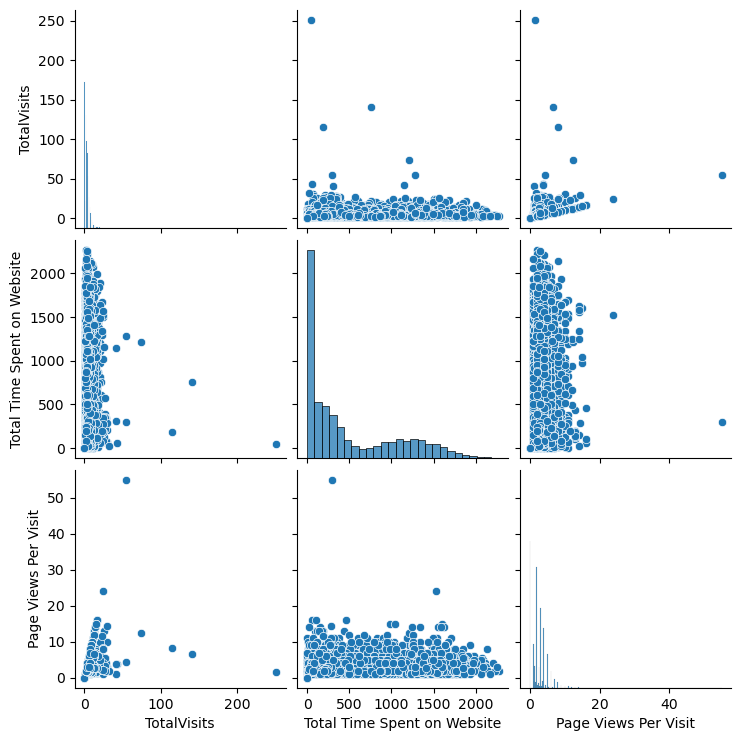

In [54]:
#plotting relationship between continuous columns through pairplot
sns.pairplot(df[cont_cols])

<AxesSubplot:>

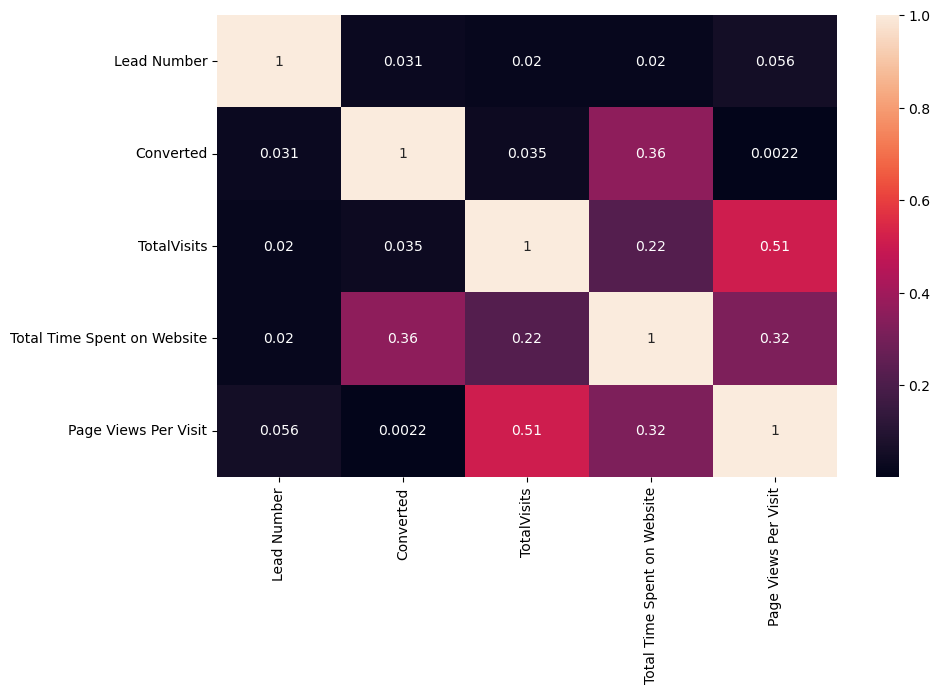

In [55]:
#plotting relationship between continuous columns through heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

Insights from multivariate analysis:
1. There is  positive correlation between continuous columns 'Total Visits' and 'Page views per visit'
2. There is  a positive correlation between 'converted column' and 'total time spent on website'
3. There is positive correlation between 'converted' and 'total visits'

In [56]:
### Checking the conversion rate to for approriately considering and dropping variables
conversion_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion_rate

38.00560224089636

In [57]:
#dropping Id columns as they will serve no purpose for futher analysis 
df.drop(id_cols,axis=1,inplace=True)

In [58]:
df.columns#checking the remaining columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'Last Notable Activity'],
      dtype='object')

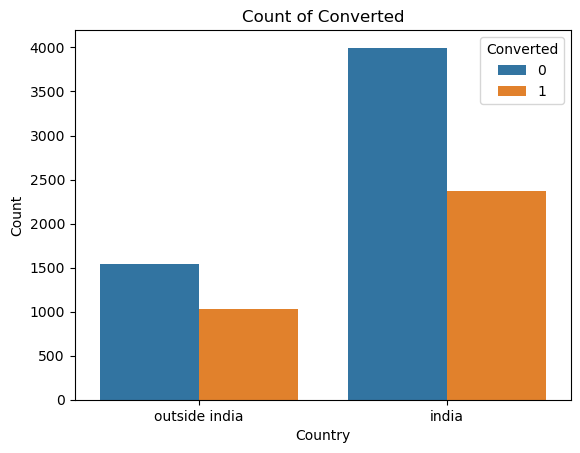

In [59]:
#plotting a graph to check for distribution of data between the column country and target column target
# Plotting the countplot
sns.countplot(data=df, x='Country', hue='Converted')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Converted')

# Display the plot
plt.show()

In [60]:
#As the column 'country' and target column 'converted' shows the country with value
#'india has the highest count hence it would be less variable for the the predictive model 
#hence we will remove the the column 'country'
df = df.drop('Country', axis=1)

### Creating X and y sets where X dataframe of  independent variables and y dataframe consists of dependent variable i.e target variable

In [61]:
#Here X is for independent variables and Y is for dependent variable 
X=df.drop("Converted",axis=1) #dropping target column and keeping rest of the independent variables for X dataframe
y=df[target]#adding only target column i.e 'Converted' to Y dataframe.
print(X.columns)
print(y.columns)

Index(['Lead Origin', 'Lead Source', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')
Index(['Converted'], dtype='object')


## Train-Test Split

In [62]:
#Splitting X and y dataframe into training and test sets 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)
#here we have split the training set to have 75 percent of training data and 25 percent for testing data

In [63]:
print("Train X shape:",X_train.shape)#checking the columns and rows of X_train
print("Test X shape:",X_test.shape)#checking the columns and rows of X_test
print("Train y shape:",y_train.shape)#checking the columns and rows of y_train
print("Test y shape:",y_test.shape)#checking the columns and rows of y_test

Train X shape: (6693, 11)
Test X shape: (2232, 11)
Train y shape: (6693, 1)
Test y shape: (2232, 1)


##  Preprocessing training and test datasets

In [64]:
#checking value counts in X_train 
for column in X_train:
    if X_train[column].dtype == 'object':  # Checking for only categorical columns data
        print(X_train[column].value_counts())

landing page submission    3552
api                        2670
lead add form               448
lead import                  23
Name: Lead Origin, dtype: int64
google              2112
direct traffic      1840
olark chat          1314
organic search       853
reference            335
welingak website     107
referral sites        92
others                40
Name: Lead Source, dtype: int64
email opened                 2576
sms sent                     2059
olark chat conversation       738
page visited on website       463
converted to lead             309
email bounced                 236
email link clicked            187
form submitted on website      94
others                         31
Name: Last Activity, dtype: int64
unknown                              2464
finance management                    696
human resource management             628
marketing management                  584
operations management                 363
business administration               293
it projects mana

In [65]:
#checking value counts in X_test
for column in X_test:
    if X_test[column].dtype == 'object':  # Check if column contains categorical data
        print(X_test[column].value_counts())

landing page submission    1229
api                         868
lead add form               128
lead import                   7
Name: Lead Origin, dtype: int64
google              704
direct traffic      663
olark chat          428
organic search      272
reference           103
referral sites       27
welingak website     22
others               13
Name: Lead Source, dtype: int64
email opened                 856
sms sent                     657
olark chat conversation      234
page visited on website      177
converted to lead            119
email link clicked            80
email bounced                 76
form submitted on website     22
others                        11
Name: Last Activity, dtype: int64
unknown                              784
finance management                   239
marketing management                 229
human resource management            198
operations management                126
business administration               96
it projects management                8

In [66]:
#we still have some missing values in the data let's handle it in missing value imputation

## Missing Value Imputation

In [67]:
#we will replace 'unknown' values in training set with standard values such as mode.
columns_to_replace = ['Specialization', 'What is your current occupation', 'Tags', 'City']

for column in columns_to_replace:
    mode_value = X_train[column].mode()[0]  # Calculate the mode value
    X_train['Specialization'] = X_train['Specialization'].replace('unknown', mode_value)
    X_train['What is your current occupation'] = X_train['What is your current occupation'].replace('unknown', mode_value)
    X_train['Tags'] = X_train['Tags'].replace('unknown', mode_value)
    X_train['City'] = X_train['City'].replace('unknown', mode_value)

In [68]:
#we will replace 'unknown' values in test set with standard values such as mode.
columns_to_replace = ['Specialization', 'What is your current occupation', 'Tags', 'City']

for column in columns_to_replace:
    mode_value = X_test[column].mode()[0]  # Calculate the mode value
    X_test['Specialization'] = X_test['Specialization'].replace('unknown', mode_value)
    X_test['What is your current occupation'] = X_test['What is your current occupation'].replace('unknown', mode_value)
    X_test['Tags'] = X_test['Tags'].replace('unknown', mode_value)
    X_test['City'] = X_test['City'].replace('unknown', mode_value)

In [69]:
#checking value counts in X_train after modifying the value counts
for column in X_train:
    if X_train[column].dtype == 'object':  # Checking if column contains categorical data
        print(X_train[column].value_counts())

landing page submission    3552
api                        2670
lead add form               448
lead import                  23
Name: Lead Origin, dtype: int64
google              2112
direct traffic      1840
olark chat          1314
organic search       853
reference            335
welingak website     107
referral sites        92
others                40
Name: Lead Source, dtype: int64
email opened                 2576
sms sent                     2059
olark chat conversation       738
page visited on website       463
converted to lead             309
email bounced                 236
email link clicked            187
form submitted on website      94
others                         31
Name: Last Activity, dtype: int64
unemployed                           2464
finance management                    696
human resource management             628
marketing management                  584
operations management                 363
business administration               293
it projects mana

In [70]:
##checking value counts in X_test after modifying the value counts
for column in X_test:
    if X_test[column].dtype == 'object':  # Checking if column contains categorical data
        print(X_test[column].value_counts())

landing page submission    1229
api                         868
lead add form               128
lead import                   7
Name: Lead Origin, dtype: int64
google              704
direct traffic      663
olark chat          428
organic search      272
reference           103
referral sites       27
welingak website     22
others               13
Name: Lead Source, dtype: int64
email opened                 856
sms sent                     657
olark chat conversation      234
page visited on website      177
converted to lead            119
email link clicked            80
email bounced                 76
form submitted on website     22
others                        11
Name: Last Activity, dtype: int64
unemployed                           784
finance management                   239
marketing management                 229
human resource management            198
operations management                126
business administration               96
it projects management                8

In [71]:
X_train.columns#displaying columns in training dataset

Index(['Lead Origin', 'Lead Source', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [72]:
X_test.columns#displaying columns in test set

Index(['Lead Origin', 'Lead Source', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

## Creating dummy variables

In [73]:
#creating dummy variables for training dataset
dum_cols=['Lead Origin', 'Lead Source', 'Last Activity'
       , 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'Last Notable Activity']
dum=pd.get_dummies(X_train[dum_cols],drop_first=True)#using get dummies to create dummy varibles for training dataset
X_train=X_train.drop(dum_cols,axis=1)
X_train=pd.concat([X_train,dum],axis=1)

In [74]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_others,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_others,Last Activity_page visited on website,Last Activity_sms sent,Specialization_business administration,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_others,Specialization_supply chain management,Specialization_travel and tourism,Specialization_unemployed,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Tags_busy,Tags_closed by horizzon,Tags_graduation in progress,Tags_interested in full time mba,Tags_interested in other courses,Tags_lost to eins,Tags_not doing further education,Tags_others,Tags_ringing,Tags_switched off,Tags_unemployed,Tags_will revert after reading the email,City_other cities,City_other cities of maharashtra,City_other metro cities,City_thane & outskirts,City_tier ii cities,City_unemployed,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_others,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
8363,3.0,1487,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8397,5.0,1154,5.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8124,6.0,453,6.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
819,11.0,2069,5.5,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
6664,1.0,1606,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [75]:
#creating dummy variables for test dataset
dum_cols=['Lead Origin', 'Lead Source', 'Last Activity'
       , 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'Last Notable Activity']
dum=pd.get_dummies(X_test[dum_cols],drop_first=True)#using get dummies to create dummy varibles for test dataset
X_test=X_test.drop(dum_cols,axis=1)
X_test=pd.concat([X_test,dum],axis=1)

In [76]:
X_train.columns#displaying all the dummy variables created in training data set

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Lead Source_google',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_others', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Last Activity_email bounced', 'Last Activity_email link clicked',
       'Last Activity_email opened', 'Last Activity_form submitted on website',
       'Last Activity_olark chat conversation', 'Last Activity_others',
       'Last Activity_page visited on website', 'Last Activity_sms sent',
       'Specialization_business administration', 'Specialization_e-commerce',
       'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international b

In [77]:
X_test.shape#checking rows and columns of test dataset

(2232, 63)

In [78]:
X_train.shape#checking rows and columns of training dataset

(6693, 63)

## Outlier Treatment

Performing Outlier treatment to address data points that significantly deviate from the normal behavior of the dataset. 

In [79]:
#doing outlier treatment for training and test sets 
for var in cont_cols:
    q1=X_train[var].describe()["25%"]
    q3=X_train[var].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    X_train[var]=np.where(X_train[var]>upper_bound,upper_bound,X_train[var])
    X_train[var]=np.where(X_train[var]<lower_bound,lower_bound,X_train[var])
    X_test[var]=np.where(X_test[var]>upper_bound,upper_bound,X_test[var])
    X_test[var]=np.where(X_test[var]<lower_bound,lower_bound,X_test[var])

## Scaling
scaling to ensure that all predictor variables have equal importance and to avoid biased coefficients.

In [80]:
#scaling continuous columns from training and test datframe using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train[['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website', 'Page Views Per Visit',
                                                                                                               'TotalVisits']])
X_test[['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website', 'Page Views Per Visit',
                                                                                                               'TotalVisits']])

## Feature Selection

Feature selection using Recursive Feature Elimination (RFE) can potentially remove the column that has high multicollinearity with another column. RFE selects the best features by recursively considering smaller and smaller sets of features based on their importance to the target variable, which can help eliminate the redundant or less important features.

In [81]:
#training the Logistic Regression model on the scaled training data
estimator=LogisticRegression()#Using RFE with a Logistic Regression estimator to perform feature selection.
selector=RFE(estimator,n_features_to_select=15)#It selects the top 15 features based on the RFE algorithm.
selector.fit(X_train,y_train)#selector.support_ indicates which features were selected for further analysis or modeling.
selector.support_

array([False,  True, False, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False,  True, False,  True])

In [82]:
cols_to_keep=X_train.columns[selector.support_]#columns selected by feature selection

In [83]:
cols_to_keep#columns selected by feature selection for training and test data sets

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_olark chat', 'Lead Source_welingak website',
       'Last Activity_sms sent', 'Tags_busy', 'Tags_closed by horizzon',
       'Tags_lost to eins', 'Tags_ringing', 'Tags_switched off',
       'Tags_unemployed', 'Tags_will revert after reading the email',
       'Last Notable Activity_email opened', 'Last Notable Activity_others',
       'Last Notable Activity_sms sent'],
      dtype='object')

In [84]:
X_train=X_train[cols_to_keep]#imputing columns selected through feature selection into training dataset
X_test=X_test[cols_to_keep]#imputing columns selected through feature selection into test dataset

Adding a Constant column

Adding a constant column to both the training and testing sets using add_constant from the statsmodels library. This ensures that the datasets have a constant term for intercept estimation when fitting statistical models.

In [85]:
X_train_sm =sm.add_constant(X_train,has_constant="add") #adding a constant column to training set
X_test_sm =sm.add_constant(X_test,has_constant="add")# adding a constant column to the test column

In [86]:
X_train_sm.head(5)#seeing first few values of training set

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Last Activity_sms sent,Tags_busy,Tags_closed by horizzon,Tags_lost to eins,Tags_ringing,Tags_switched off,Tags_unemployed,Tags_will revert after reading the email,Last Notable Activity_email opened,Last Notable Activity_others,Last Notable Activity_sms sent
8363,1.0,1.860316,0,0,0,1,0,0,0,1,0,0,0,0,0,1
8397,1.0,1.246404,0,0,0,1,0,0,0,0,0,0,1,0,0,1
8124,1.0,-0.045947,0,0,0,1,0,0,0,0,1,0,0,0,0,1
819,1.0,2.933281,0,0,0,0,0,0,0,0,0,0,1,1,0,0
6664,1.0,2.079703,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [87]:
y_train["Converted"].head()# target column we are using in training dataset to train the model to predict the values

8363    0
8397    1
8124    0
819     1
6664    0
Name: Converted, dtype: int64

## Model 1

In [88]:
#Creating a generalized linear model (GLM) using the training data
model1=sm.GLM(np.array(y_train["Converted"]),X_train_sm,family=sm.families.Binomial())#The family parameter is set to sm.families.Binomial() indicating a binomial distribution
#The response variable is the "Converted" column from the y_train dataframe
result1=model1.fit()# Fitting the GLM model to the training data and to obtain the result
result1.summary()## Printing the summary of the  model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6693
Model:                            GLM   Df Residuals:                     6677
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1293.3
Date:                Mon, 05 Jun 2023   Deviance:                       2586.5
Time:                        06:41:30   Pearson chi2:                 1.11e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6120
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.2568      0.225    -23.406      0.000      -5.697      -4.817
Total Time Spent on Website                  1.0957      0.059     18.426      0.000       0.979       1.212
Lead Origin_lead add form                    1.3717      0.393      3.487      0.000       0.601       2.143
Lead Source_olark chat                       1.2612      0.143      8.810      0.000       0.981       1.542
Lead Source_welingak website                 4.3090      0.833      5.172      0.000       2.676       5.942
Last Activity_sms sent                       1.3517      0.212      6.370      0.000       0.936       1.768
Tags_busy                                    3.0293      0.302     10.030      0.000       2.437       3.621
Tags_closed by horizzon                      9.0477      0.762     11.878      0.000       7.555      10.541
Tags_lost to eins                            7.7274      0.562     13.762      0.000       6.627       8.828
Tags_ringing                                -1.2237      0.283     -4.324      0.000      -1.778      -0.669
Tags_switched off                           -2.3250      0.761     -3.056      0.002      -3.816      -0.834
Tags_unemployed                              2.1264      0.201     10.570      0.000       1.732       2.521
Tags_will revert after reading the email     6.8210      0.262     26.024      0.000       6.307       7.335
Last Notable Activity_email opened           1.4802      0.139     10.621      0.000       1.207       1.753
Last Notable Activity_others                 1.3145      0.516      2.548      0.011       0.303       2.326
Last Notable Activity_sms sent               2.3209      0.208     11.145      0.000       1.913       2.729
============================================================================================================
"""

let's do Variance inflation factors to remove columns which have multicollinearity

In [89]:
#calculateing the Variance Inflation Factor (VIF) for each feature in the X_train_sm DataFrame 
#and storing the results in the vif_data DataFrame.
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns# Assigning column names of X_train_sm as the "Feature" column in vif_data
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
# Calculating the VIF for each feature and storing the values in the "VIF" column of vif_data
vif_data

,Feature,VIF
0,const,6.692541
1,Total Time Spent on Website,1.449022
2,Lead Origin_lead add form,1.720175
3,Lead Source_olark chat,1.315342
4,Lead Source_welingak website,1.360588
5,Last Activity_sms sent,4.086635
6,Tags_busy,1.125056
7,Tags_closed by horizzon,1.293027
8,Tags_lost to eins,1.119133
9,Tags_ringing,1.607466


In [90]:
import joblib#importing to save the tarined model

# Saving the trained model
joblib.dump(result1, 'trained_model.joblib')

['trained_model.joblib']

## Evaluation
Evaluating the model we built based on actual and predicted values 

In [91]:
y_pred=result1.predict(X_train_sm)
y_pred[:10]

8363    0.316577
8397    0.998645
8124    0.018713
819     0.998090
6664    0.159292
2155    0.803915
7086    0.055480
1664    0.001104
1608    0.006943
9048    0.708314
dtype: float64

In [92]:
#creating a DataFrame called 'train' to store the predicted probabilities, actual values,
#and predicted classes for the training data.
train=pd.DataFrame(y_pred,columns=["Predicted_prob"])
train["Actual"]=y_train["Converted"]
train["Predicted_Class"]=np.where(train["Predicted_prob"]>0.5,1,0)

In [93]:
train.head(10)

,Predicted_prob,Actual,Predicted_Class
8363,0.316577,0,0
8397,0.998645,1,1
8124,0.018713,0,0
819,0.998090,1,1
6664,0.159292,0,0
2155,0.803915,1,1
7086,0.055480,0,0
1664,0.001104,0,0
1608,0.006943,0,0
9048,0.708314,1,1


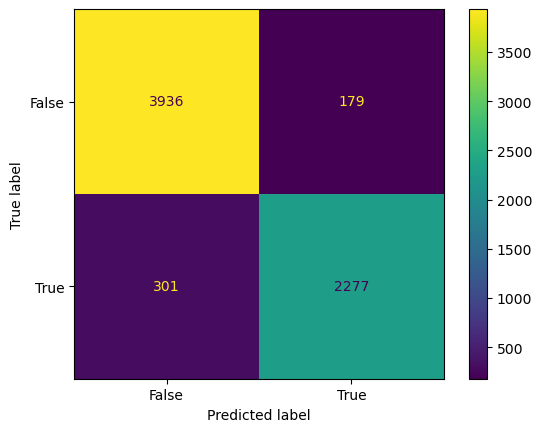

In [94]:
# using metrics from sklearn libraray to plot confusion matrix
confusion_matrix=metrics.confusion_matrix(train["Actual"],train["Predicted_Class"])
#Computing the confusion matrix using actual and predicted class labels from the training data
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
#Creating a ConfusionMatrixDisplay object with the computed confusion matrix
cm_display.plot()#Plotting the confusion matrix
plt.show()

In [95]:
print("Accuracy =", metrics.accuracy_score(train["Actual"], train["Predicted_Class"]))
print("Recall =", metrics.recall_score(train["Actual"], train["Predicted_Class"]))
print("Precision =", metrics.precision_score(train["Actual"], train["Predicted_Class"]))

Accuracy = 0.9282832810398924
Recall = 0.8832428238944918
Precision = 0.9271172638436482


In [96]:
y_pred=result1.predict(X_test_sm)#predicting target variable using test dataset

In [102]:
pred=100*y_pred
pred.head()
#assigning value from 1 to 100 on predicted values

6326    19.155497
8987    99.113906
4723    99.979782
8800     0.224906
2076     0.703958
dtype: float64

### Performing post-processing on the predicted probabilities obtained from the logistic regression model on the test dataset and creating a DataFrame called "test" to store the results

In [98]:
#using the model we will predict values from test dataset 
test=pd.DataFrame(y_pred,columns=["Predicted_prob"])
test["Actual"]=y_test["Converted"]
test["Predicted_Class"]=np.where(test["Predicted_prob"]>0.5,1,0)# the values more than 0.5 are considered as 1 i.e converted

In [99]:
test.head(10)

,Predicted_prob,Actual,Predicted_Class
6326,0.191555,0,0
8987,0.991139,1,1
4723,0.999798,1,1
8800,0.002249,0,0
2076,0.007040,0,0
6285,0.002384,0,0
9000,0.002236,0,0
644,0.825235,1,1
2256,0.996059,1,1
8051,0.145704,0,0


Confusion matrix provides a comprehensive summary of the model's performance, showing the number of correct and incorrect predictions for each class.

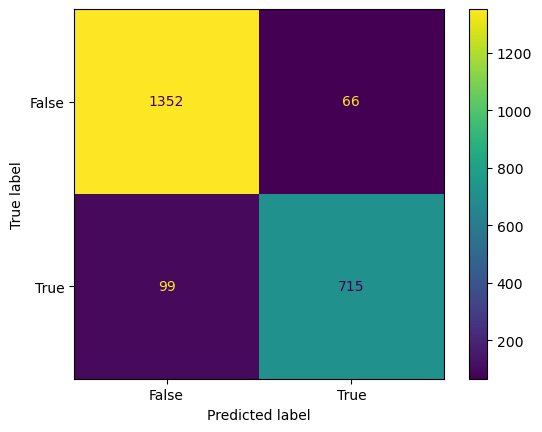

In [100]:
# using metrics from sklearn libraray to plot confusion matrix
confusion_matrix=metrics.confusion_matrix(test["Actual"],test["Predicted_Class"])
#Computing the confusion matrix using actual and predicted class labels from the test data
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
#Creating a ConfusionMatrixDisplay object with the computed confusion matrix
cm_display.plot()#Plotting the confusion matrix
plt.show()

In [101]:
print("Accuracy =", metrics.accuracy_score(test["Actual"], test["Predicted_Class"]))
print("Recall =", metrics.recall_score(test["Actual"], test["Predicted_Class"]))
print("Precision =", metrics.precision_score(test["Actual"], test["Predicted_Class"]))

Accuracy = 0.9260752688172043
Recall = 0.8783783783783784
Precision = 0.9154929577464789


From the results, we can derive the following insights:

1. The accuracy score is 0.926, which indicates that the model predicted the correct class for approximately 92.6% of the test samples. This suggests that the model performs well in terms of overall accuracy.

2. The recall score is 0.878, which represents the ability of the model to correctly identify positive cases (True Positives) out of all actual positive cases (True Positives + False Negatives). In this case, the model has a recall of 0.878, which suggests that it can capture about 87.8% of the actual positive cases.

3. Precision: The precision score is 0.915, which represents the ability of the model to correctly identify positive cases (True Positives) out of all predicted positive cases (True Positives + False Positives).In this case, the model has a precision of 0.915, which suggests that when it predicts a positive case, it is correct about 91.5% of the time.
